In [1]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Iwo_Project.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.head(7)




Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01      21.3      32.3        1.17        9.931389          16.6404   
1979-02-01      21.1      34.0        1.62        9.671111          16.6992   
1979-03-01      22.9      34.1        1.80        9.835556          17.7576   
1979-04-01      22.6      32.7        2.04        9.655833          16.7832   
1979-05-01      21.5      30.7        1.55        9.853056          18.5556   
1979-06-01      21.3      28.5        1.69        8.735000          13.6500   
1979-07-01      20.7      27.7        1.78        8.067222          11.1216   

             ETo  
Date              
1979-01-01  3.89  
1979-02-01  4.49  
1979-03-01  4.78  
1979-04-01  4.62  
1979-05-01  4.38  
1979-06-01  3.46  
1979-07-01  3.08

### Checking for missing values

In [2]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

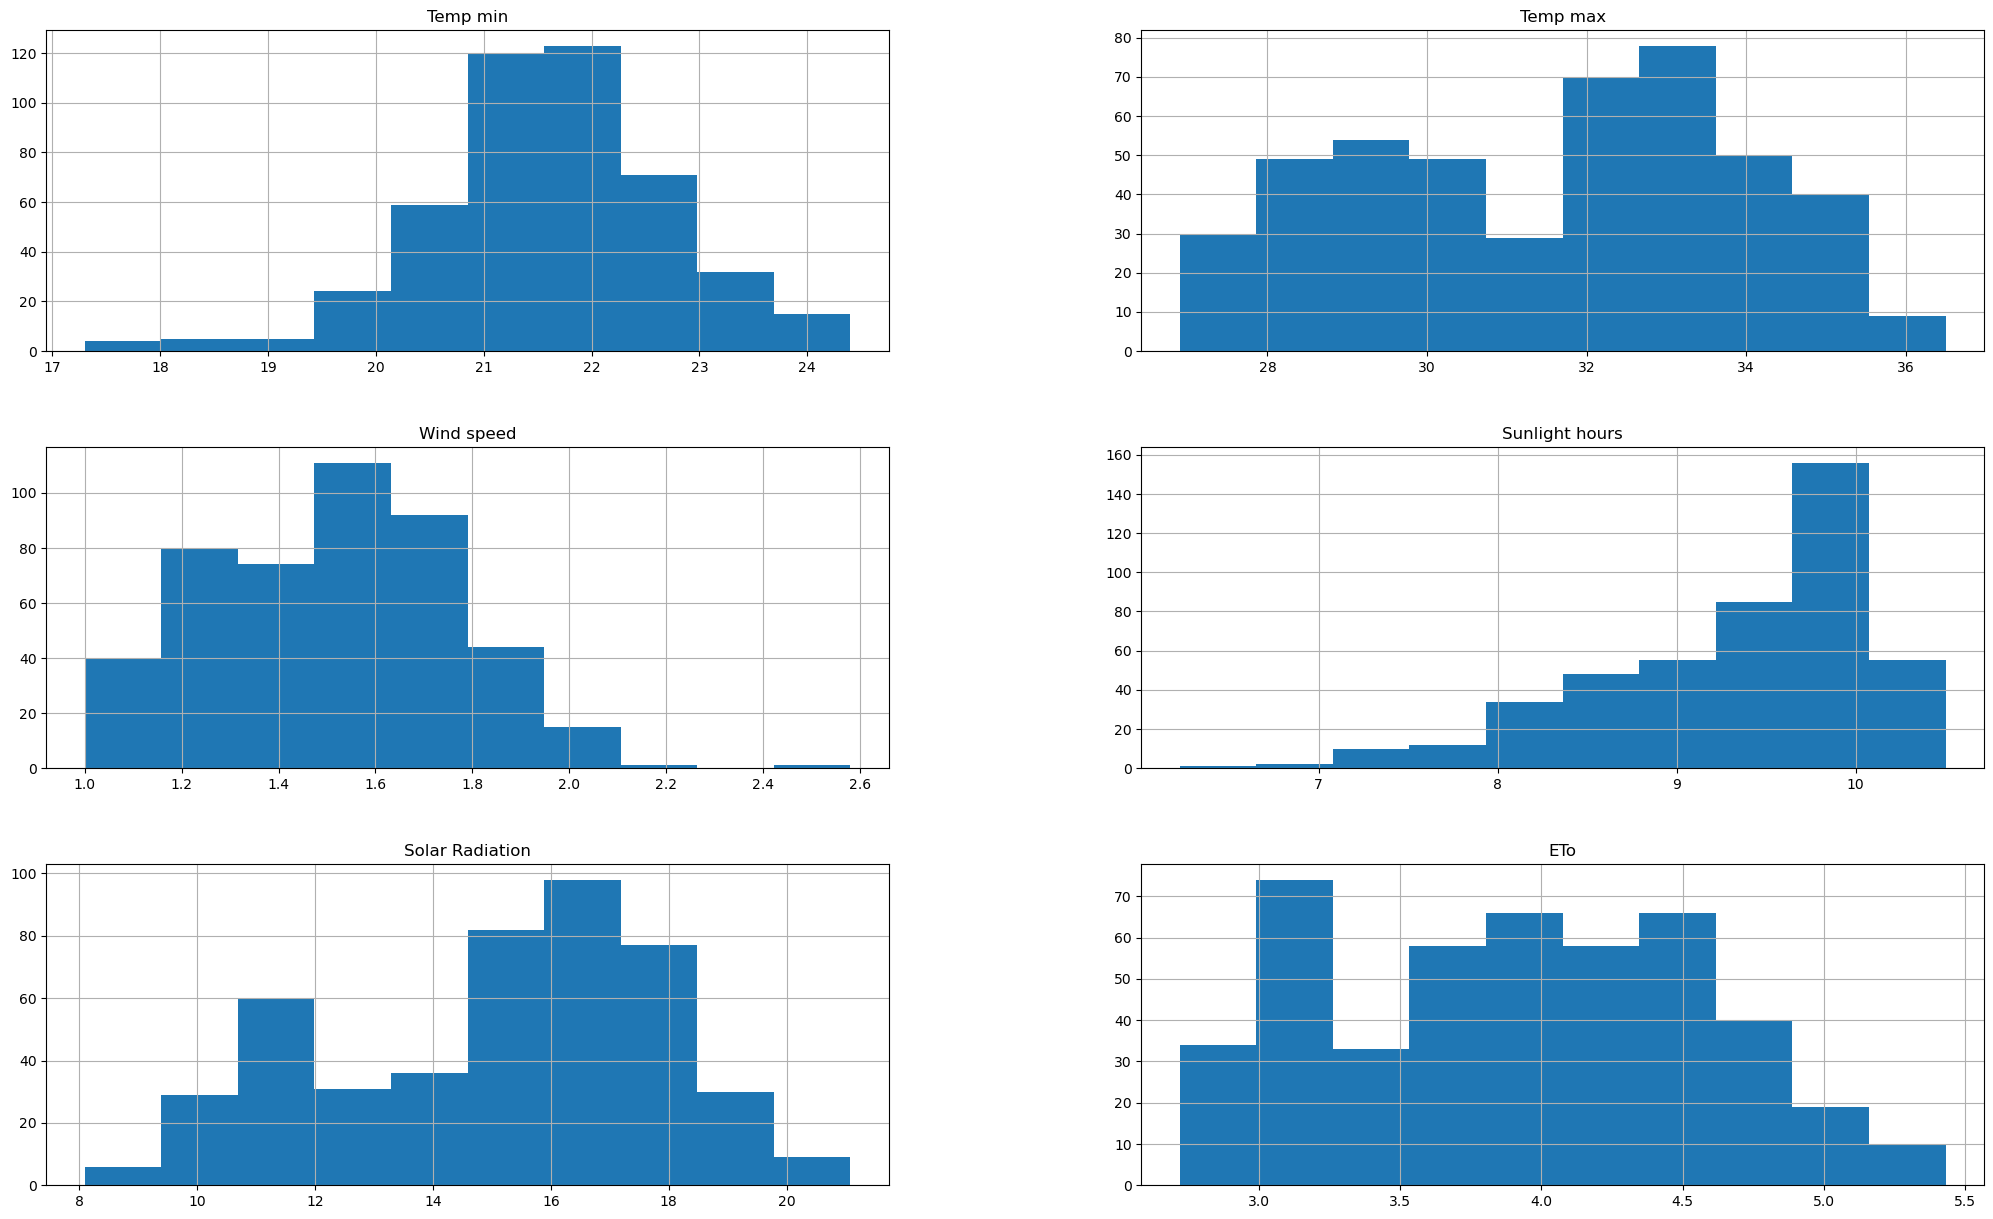

In [4]:
data.hist(figsize=(25,15))

<AxesSubplot:>

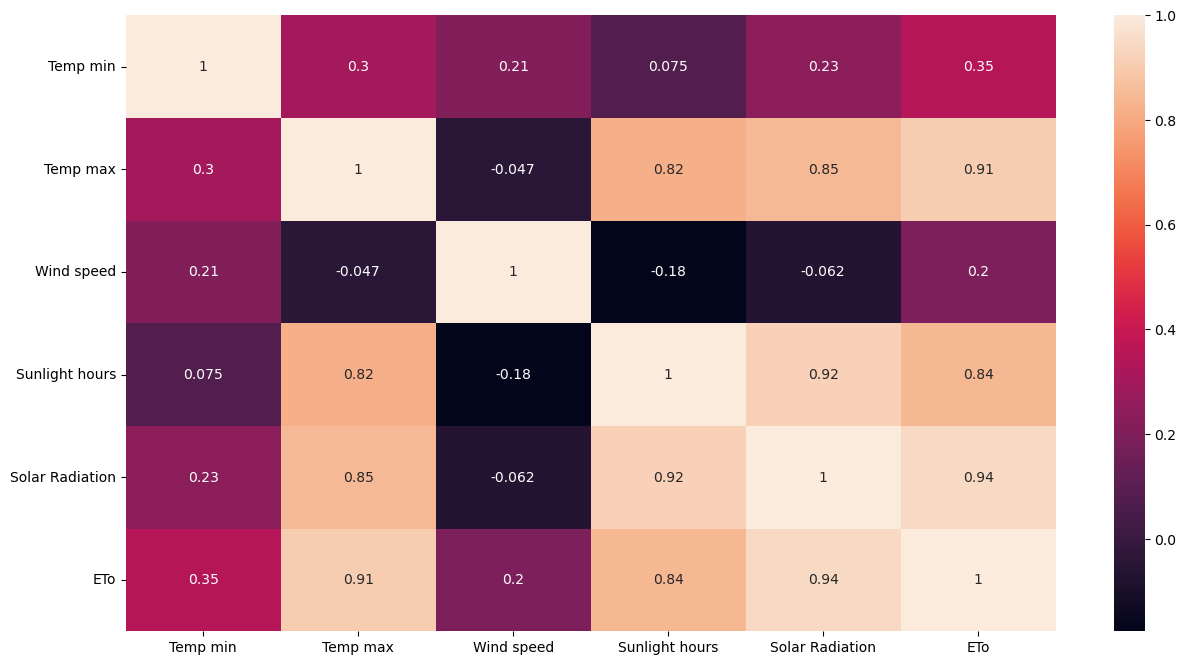

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

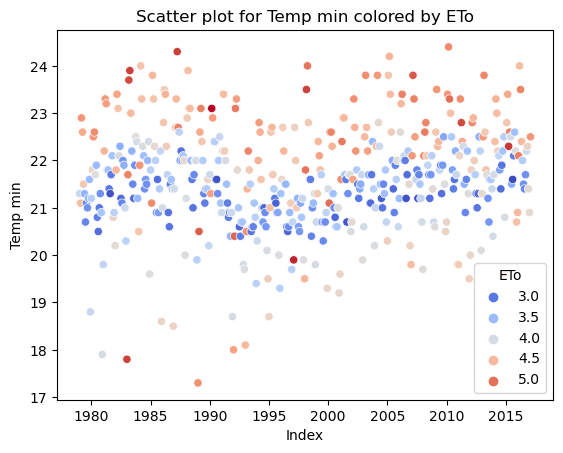

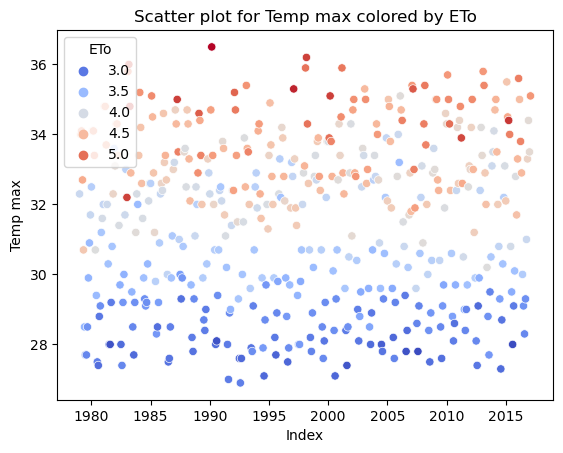

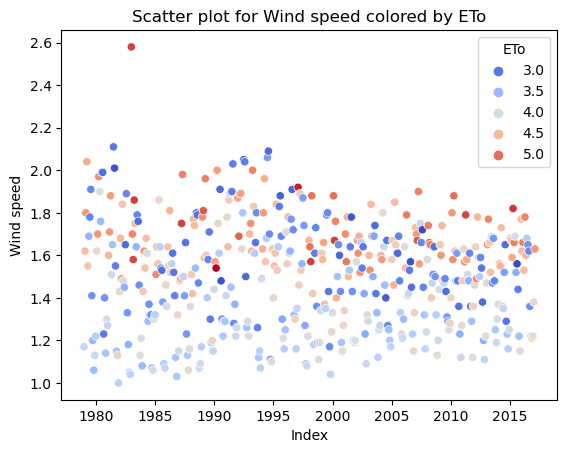

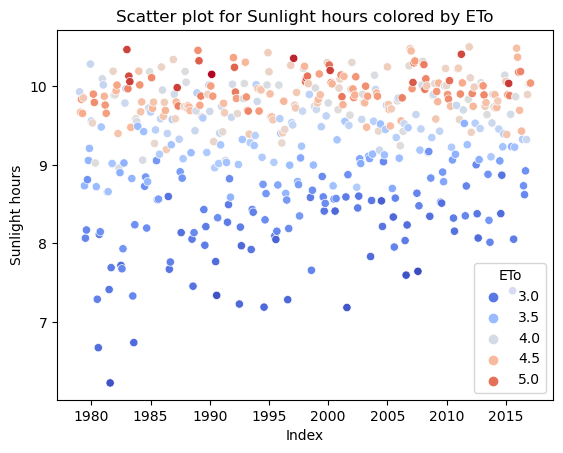

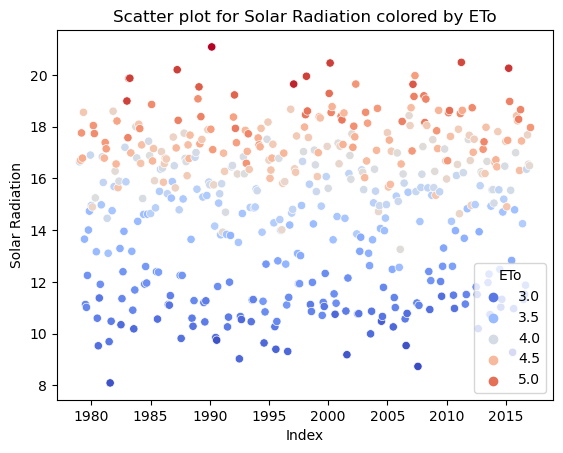

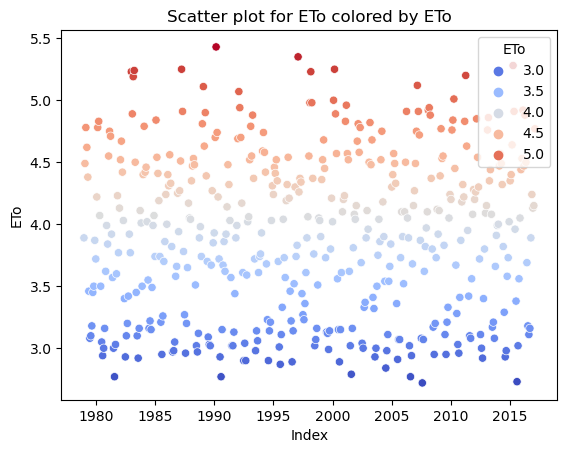

In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

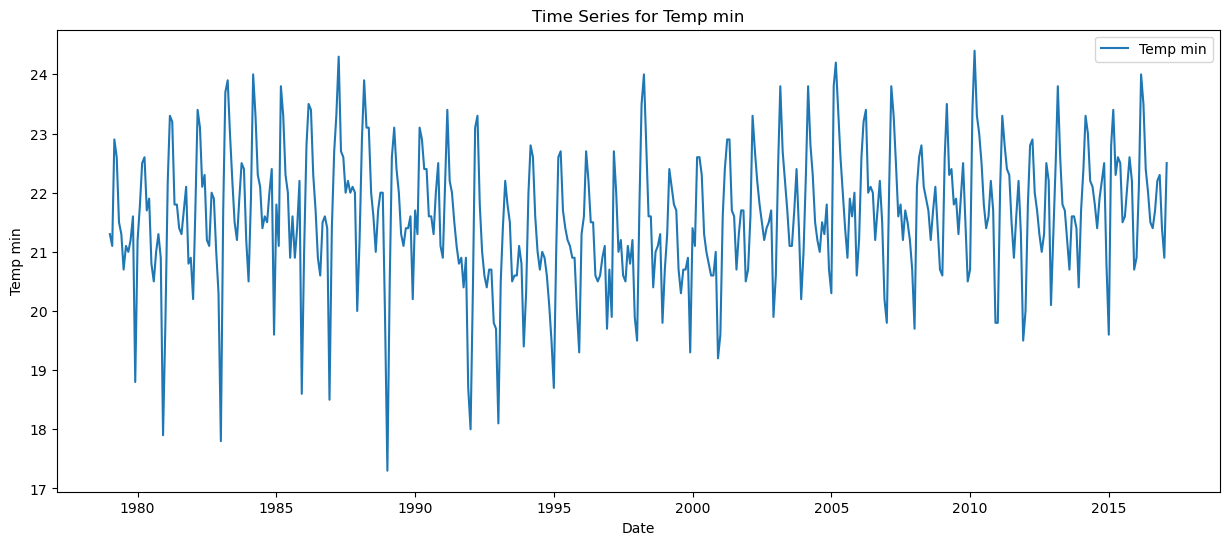

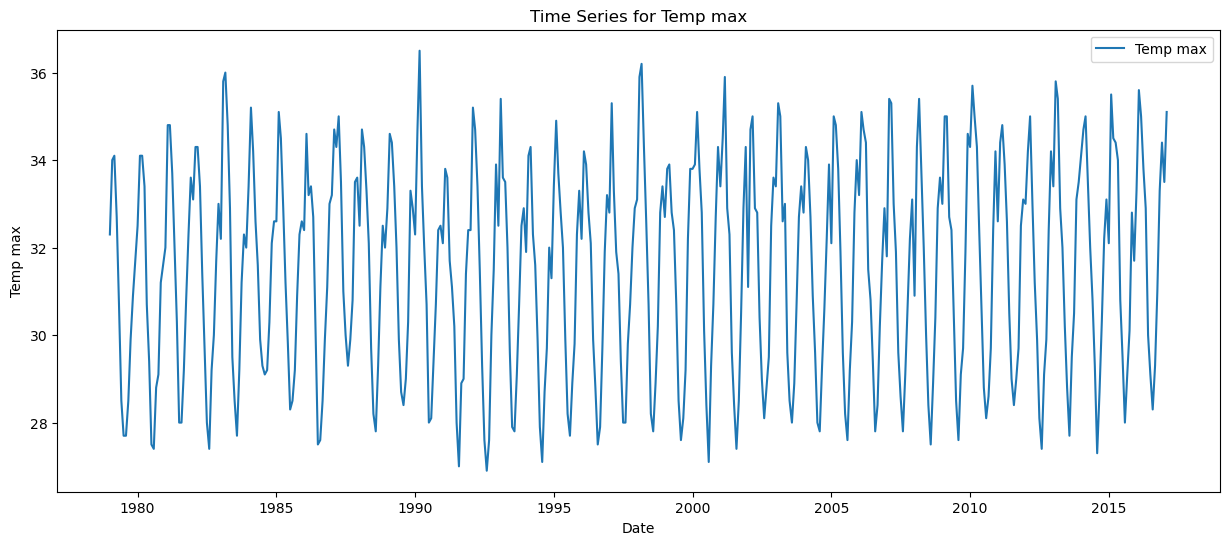

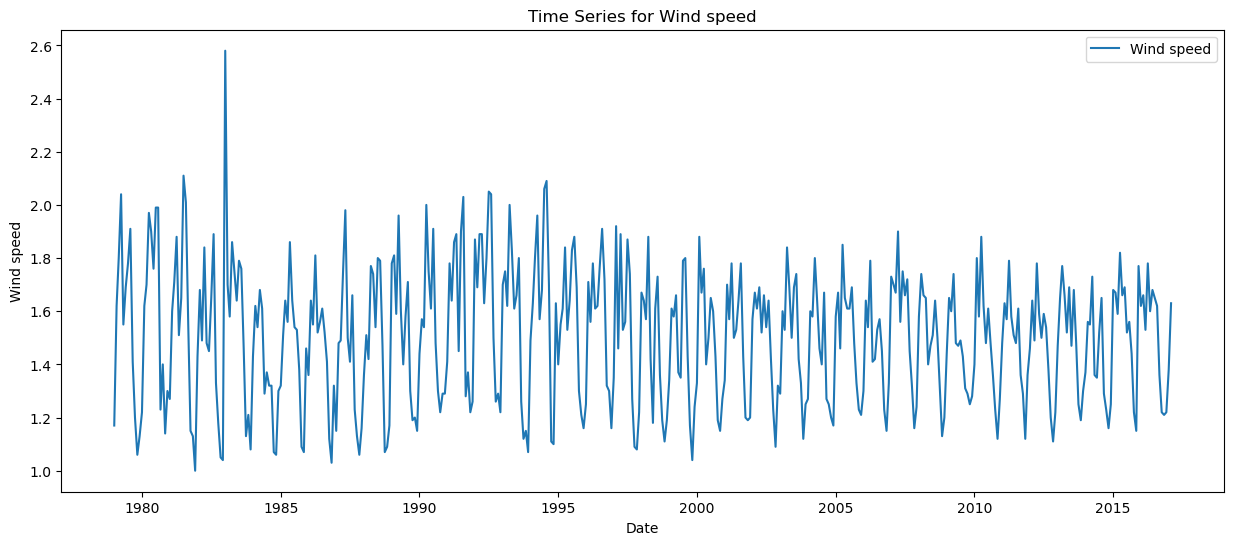

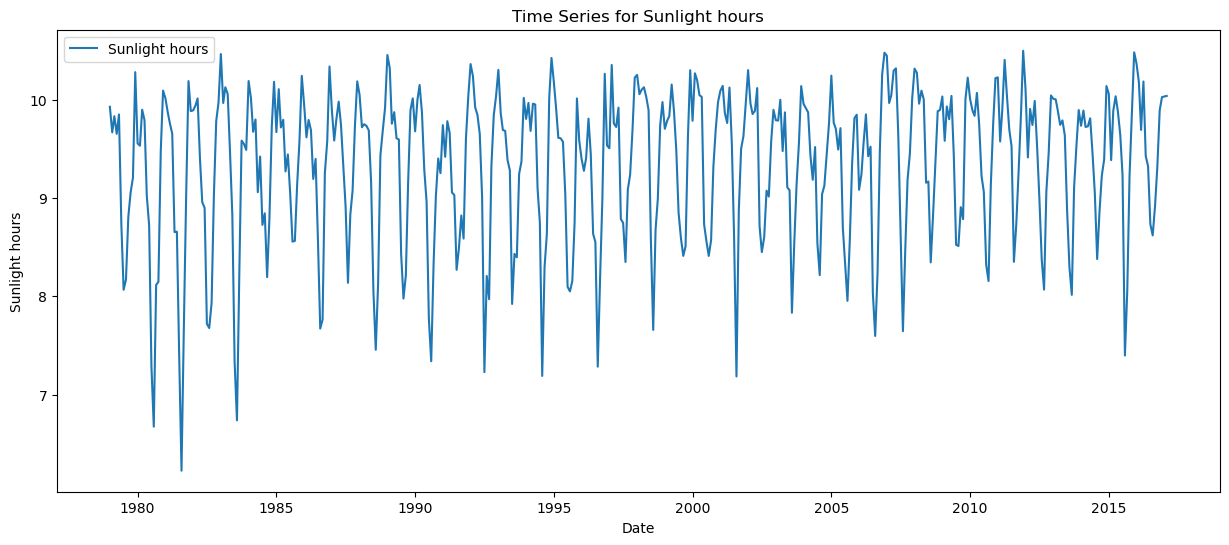

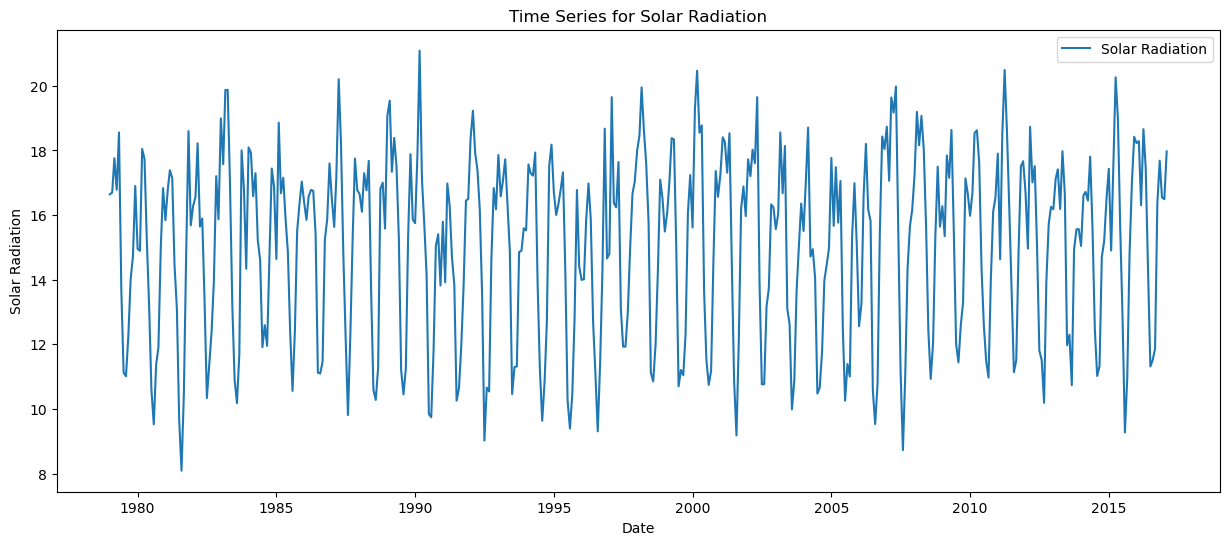

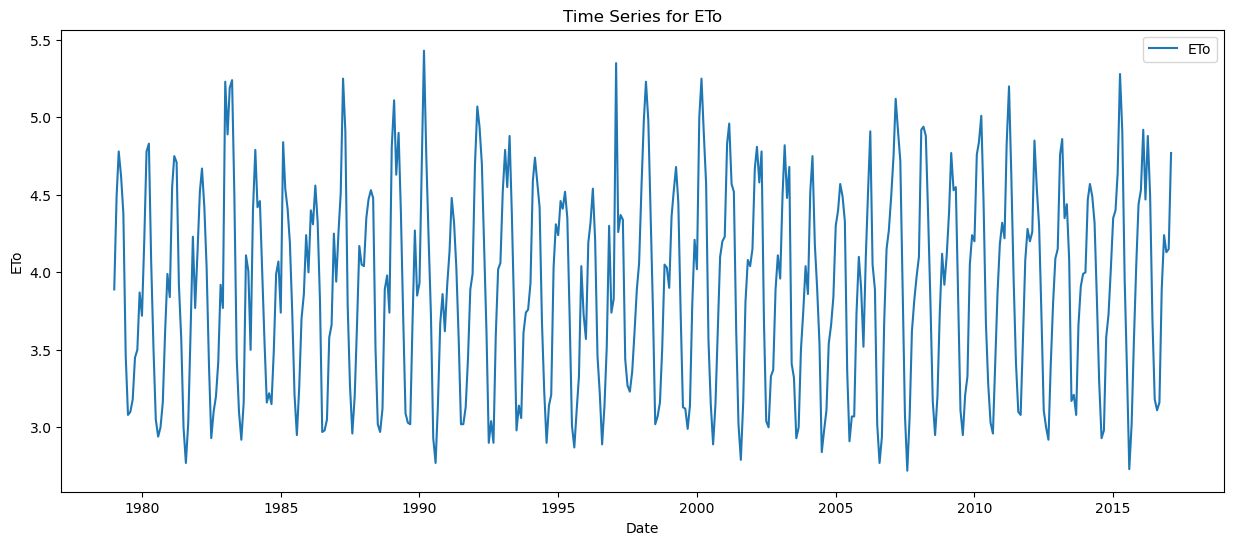

In [7]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [8]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [9]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


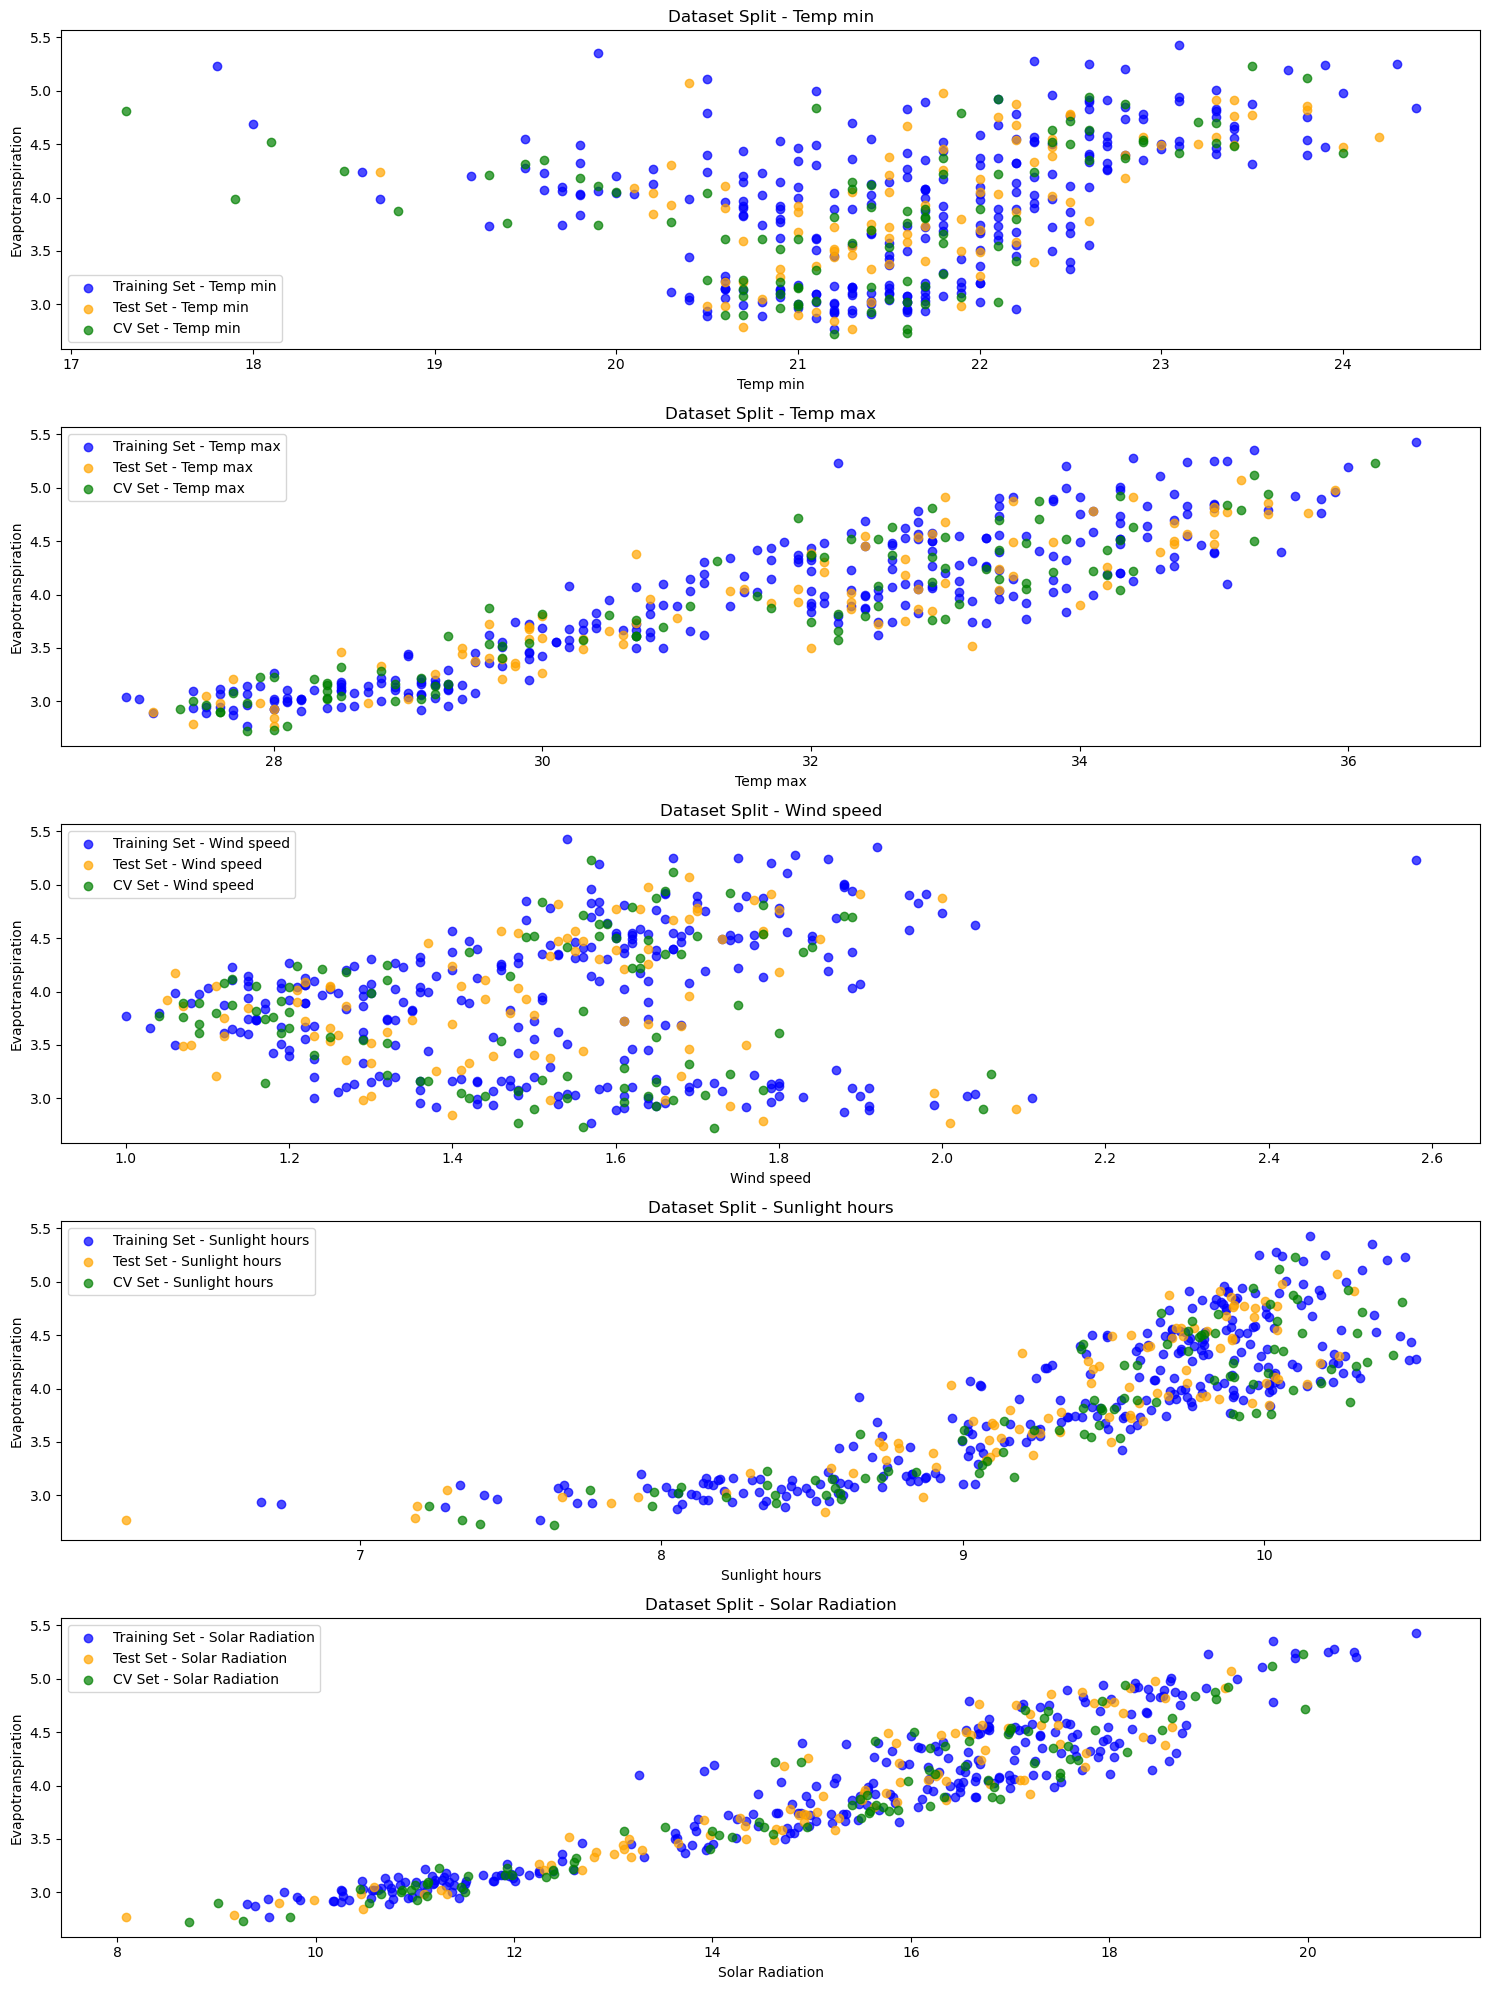

In [10]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

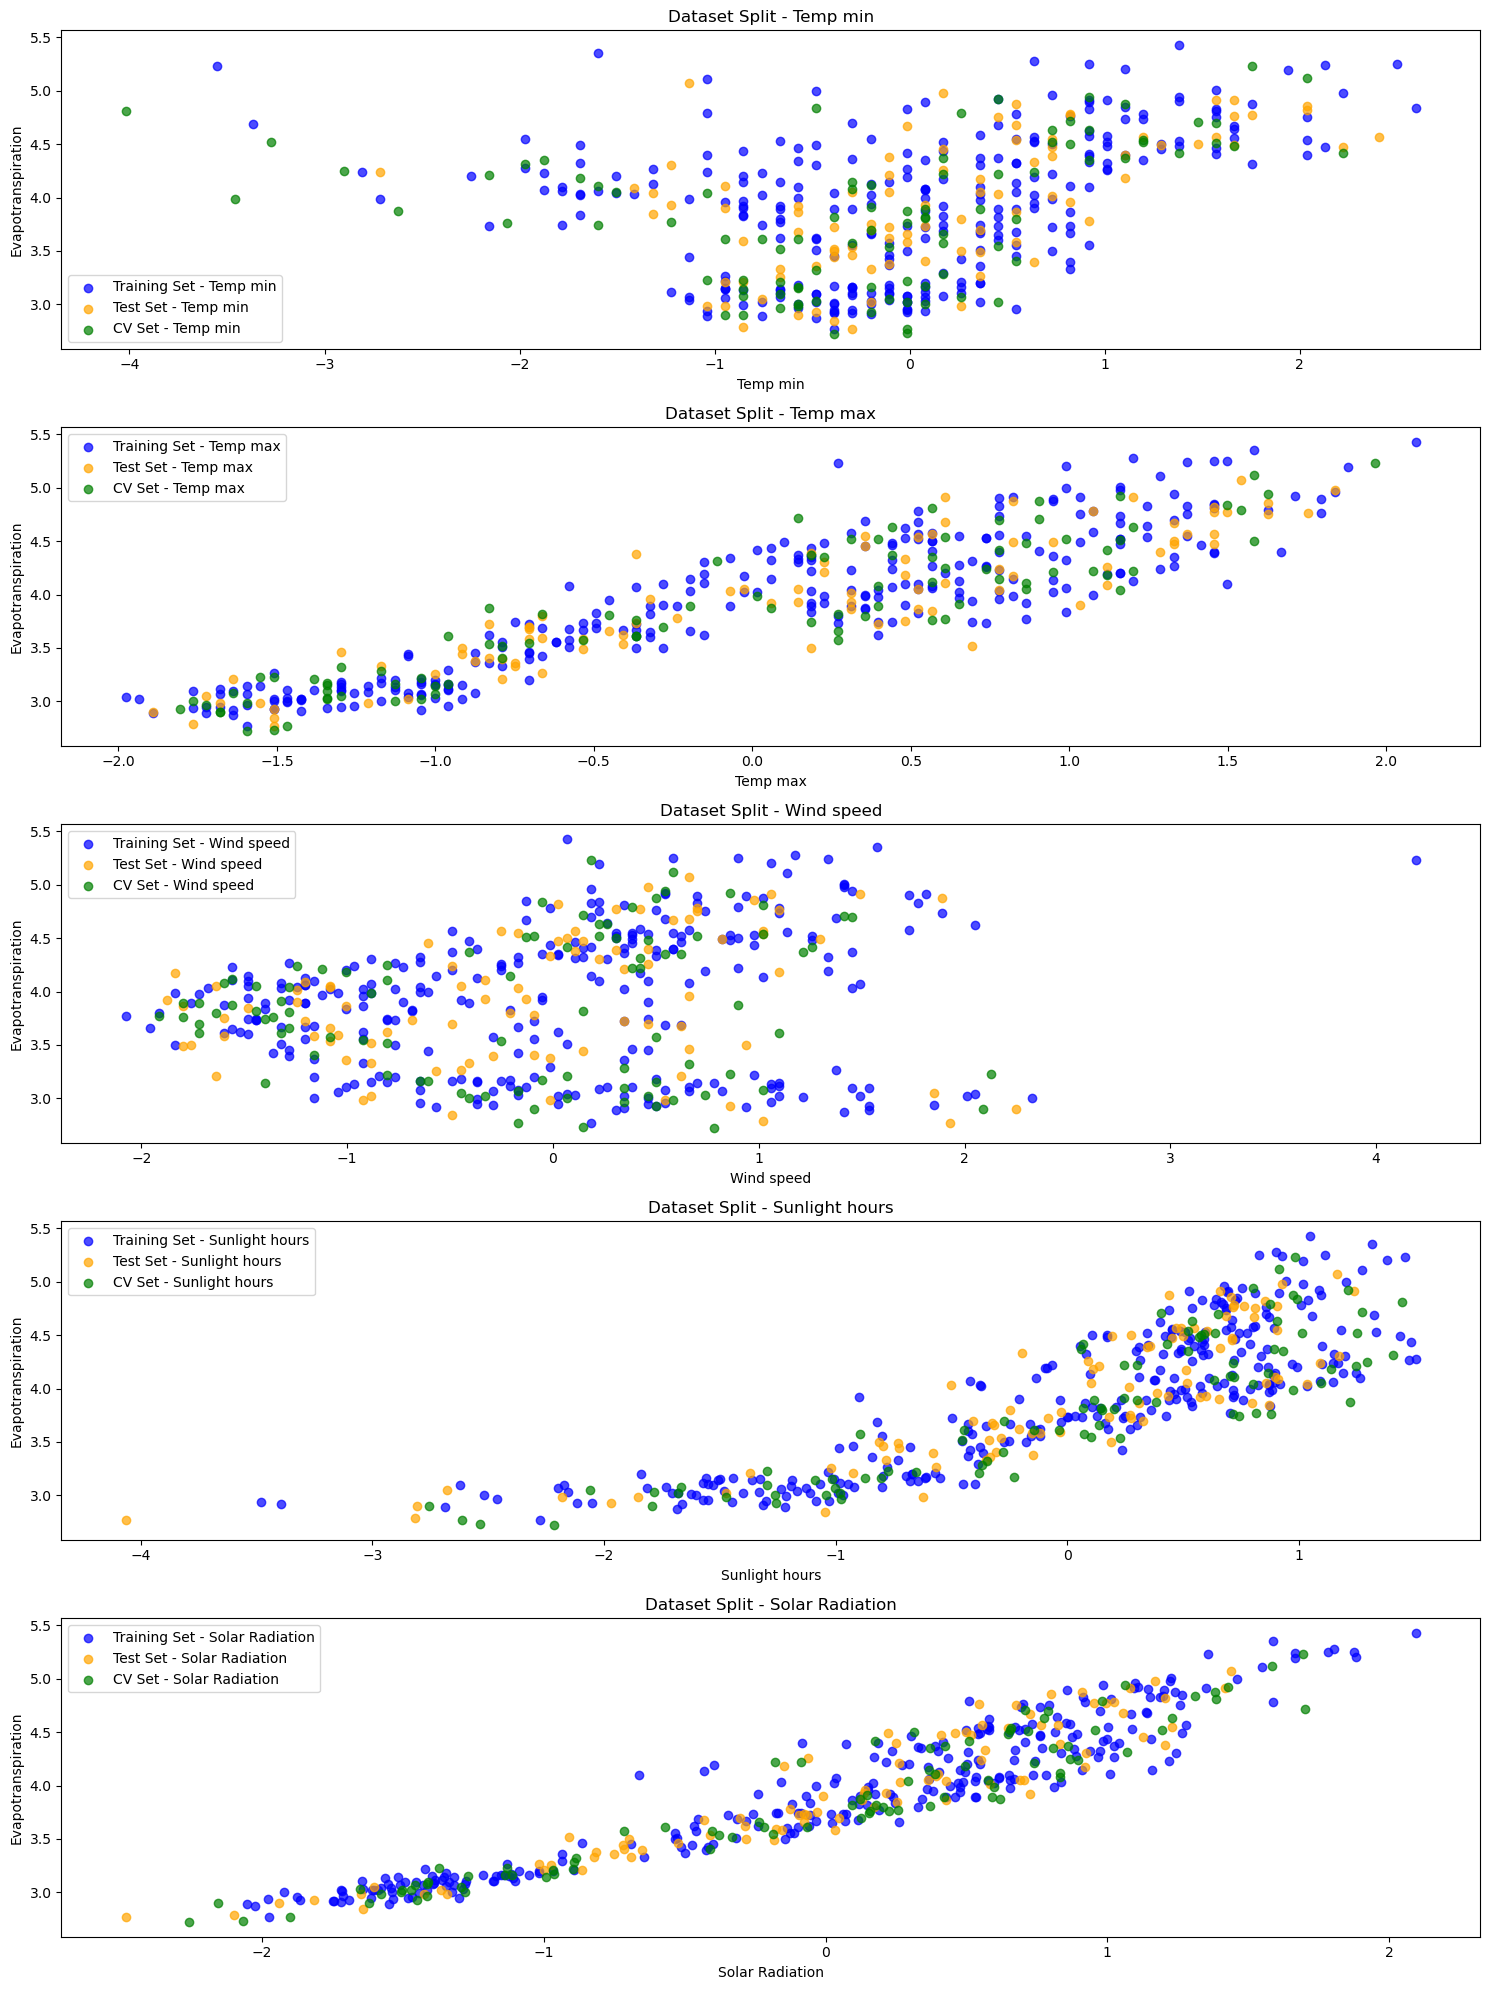

In [11]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 3s 8ms/step - loss: 19.9904 - mae: 4.4210
Epoch 2/150
9/9 [==============================] - 0s 27ms/step - loss: 18.7763 - mae: 4.2890
Epoch 3/150
9/9 [==============================] - 0s 15ms/step - loss: 17.6355 - mae: 4.1600
Epoch 4/150
9/9 [==============================] - 0s 10ms/step - loss: 16.5545 - mae: 4.0336
Epoch 5/150
9/9 [==============================] - 0s 11ms/step - loss: 15.4964 - mae: 3.9059
Epoch 6/150
9/9 [==============================] - 0s 11ms/step - loss: 14.5328 - mae: 3.7839
Epoch 7/150
9/9 [==============================] - 0s 13ms/step - loss: 13.5718 - mae: 3.6582
Epoch 8/150
9/9 [==============================] - 0s 11ms/step - loss: 12.6734 - mae: 3.5358
Epoch 9/150
9/9 [==============================] - 0s 6ms/step - loss: 11.8018 - mae: 3.4119
Epoch 10/150
9/9 [==============================] - 0s 11ms/step - loss: 10.9468 - mae: 3.2856
Epoch 11/150
9/9 [==============================] - 0s 6ms/st

9/9 [==============================] - 0s 15ms/step - loss: 0.3332 - mae: 0.4366
Epoch 89/150
9/9 [==============================] - 0s 13ms/step - loss: 0.3253 - mae: 0.4314
Epoch 90/150
9/9 [==============================] - 0s 11ms/step - loss: 0.3177 - mae: 0.4264
Epoch 91/150
9/9 [==============================] - 0s 9ms/step - loss: 0.3099 - mae: 0.4215
Epoch 92/150
9/9 [==============================] - 0s 13ms/step - loss: 0.3028 - mae: 0.4168
Epoch 93/150
9/9 [==============================] - 0s 11ms/step - loss: 0.2963 - mae: 0.4123
Epoch 94/150
9/9 [==============================] - 0s 28ms/step - loss: 0.2887 - mae: 0.4076
Epoch 95/150
9/9 [==============================] - 0s 13ms/step - loss: 0.2816 - mae: 0.4027
Epoch 96/150
9/9 [==============================] - 0s 13ms/step - loss: 0.2754 - mae: 0.3982
Epoch 97/150
9/9 [==============================] - 0s 12ms/step - loss: 0.2686 - mae: 0.3930
Epoch 98/150
9/9 [==============================] - 0s 11ms/step - loss: 0

9/9 [==============================] - 0s 10ms/step - loss: 1.6534 - mae: 1.0259
Epoch 25/150
9/9 [==============================] - 0s 19ms/step - loss: 1.5188 - mae: 0.9645
Epoch 26/150
9/9 [==============================] - 0s 15ms/step - loss: 1.4052 - mae: 0.9119
Epoch 27/150
9/9 [==============================] - 0s 13ms/step - loss: 1.3106 - mae: 0.8659
Epoch 28/150
9/9 [==============================] - 0s 11ms/step - loss: 1.2328 - mae: 0.8284
Epoch 29/150
9/9 [==============================] - 0s 10ms/step - loss: 1.1673 - mae: 0.7964
Epoch 30/150
9/9 [==============================] - 0s 20ms/step - loss: 1.1173 - mae: 0.7715
Epoch 31/150
9/9 [==============================] - 0s 13ms/step - loss: 1.0711 - mae: 0.7485
Epoch 32/150
9/9 [==============================] - 0s 15ms/step - loss: 1.0344 - mae: 0.7305
Epoch 33/150
9/9 [==============================] - 0s 20ms/step - loss: 1.0000 - mae: 0.7124
Epoch 34/150
9/9 [==============================] - 0s 17ms/step - loss: 

9/9 [==============================] - 0s 16ms/step - loss: 0.2284 - mae: 0.2952
Epoch 112/150
9/9 [==============================] - 0s 23ms/step - loss: 0.2247 - mae: 0.2918
Epoch 113/150
9/9 [==============================] - 0s 10ms/step - loss: 0.2207 - mae: 0.2882
Epoch 114/150
9/9 [==============================] - 0s 27ms/step - loss: 0.2172 - mae: 0.2850
Epoch 115/150
9/9 [==============================] - 0s 24ms/step - loss: 0.2136 - mae: 0.2815
Epoch 116/150
9/9 [==============================] - 0s 15ms/step - loss: 0.2101 - mae: 0.2780
Epoch 117/150
9/9 [==============================] - 0s 16ms/step - loss: 0.2069 - mae: 0.2749
Epoch 118/150
9/9 [==============================] - 0s 14ms/step - loss: 0.2034 - mae: 0.2716
Epoch 119/150
9/9 [==============================] - 0s 12ms/step - loss: 0.2001 - mae: 0.2686
Epoch 120/150
9/9 [==============================] - 0s 18ms/step - loss: 0.1968 - mae: 0.2653
Epoch 121/150
9/9 [==============================] - 0s 17ms/ste

9/9 [==============================] - 0s 13ms/step - loss: 0.7966 - mae: 0.5190
Epoch 49/150
9/9 [==============================] - 0s 8ms/step - loss: 0.7809 - mae: 0.5117
Epoch 50/150
9/9 [==============================] - 0s 8ms/step - loss: 0.7652 - mae: 0.5041
Epoch 51/150
9/9 [==============================] - 0s 22ms/step - loss: 0.7511 - mae: 0.4977
Epoch 52/150
9/9 [==============================] - 0s 9ms/step - loss: 0.7373 - mae: 0.4912
Epoch 53/150
9/9 [==============================] - 0s 9ms/step - loss: 0.7240 - mae: 0.4849
Epoch 54/150
9/9 [==============================] - 0s 9ms/step - loss: 0.7103 - mae: 0.4785
Epoch 55/150
9/9 [==============================] - 0s 8ms/step - loss: 0.6975 - mae: 0.4721
Epoch 56/150
9/9 [==============================] - 0s 12ms/step - loss: 0.6854 - mae: 0.4665
Epoch 57/150
9/9 [==============================] - 0s 16ms/step - loss: 0.6738 - mae: 0.4607
Epoch 58/150
9/9 [==============================] - 0s 21ms/step - loss: 0.6620

9/9 [==============================] - 0s 8ms/step - loss: 0.1899 - mae: 0.1701
Epoch 136/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1870 - mae: 0.1677
Epoch 137/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1842 - mae: 0.1655
Epoch 138/150
9/9 [==============================] - 0s 11ms/step - loss: 0.1813 - mae: 0.1630
Epoch 139/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1786 - mae: 0.1609
Epoch 140/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1759 - mae: 0.1585
Epoch 141/150
9/9 [==============================] - 0s 13ms/step - loss: 0.1731 - mae: 0.1563
Epoch 142/150
9/9 [==============================] - 0s 14ms/step - loss: 0.1708 - mae: 0.1547
Epoch 143/150
9/9 [==============================] - 0s 18ms/step - loss: 0.1682 - mae: 0.1525
Epoch 144/150
9/9 [==============================] - 0s 16ms/step - loss: 0.1658 - mae: 0.1505
Epoch 145/150
9/9 [==============================] - 0s 15ms/step - l

9/9 [==============================] - 0s 8ms/step - loss: 0.6988 - mae: 0.3220
Epoch 73/150
9/9 [==============================] - 0s 10ms/step - loss: 0.6819 - mae: 0.3156
Epoch 74/150
9/9 [==============================] - 0s 8ms/step - loss: 0.6657 - mae: 0.3091
Epoch 75/150
9/9 [==============================] - 0s 8ms/step - loss: 0.6499 - mae: 0.3025
Epoch 76/150
9/9 [==============================] - 0s 10ms/step - loss: 0.6343 - mae: 0.2963
Epoch 77/150
9/9 [==============================] - 0s 14ms/step - loss: 0.6196 - mae: 0.2903
Epoch 78/150
9/9 [==============================] - 0s 15ms/step - loss: 0.6052 - mae: 0.2844
Epoch 79/150
9/9 [==============================] - 0s 13ms/step - loss: 0.5909 - mae: 0.2785
Epoch 80/150
9/9 [==============================] - 0s 10ms/step - loss: 0.5774 - mae: 0.2733
Epoch 81/150
9/9 [==============================] - 0s 11ms/step - loss: 0.5642 - mae: 0.2677
Epoch 82/150
9/9 [==============================] - 0s 10ms/step - loss: 0.5

Epoch 9/150
9/9 [==============================] - 0s 8ms/step - loss: 8.4981 - mae: 2.5224
Epoch 10/150
9/9 [==============================] - 0s 10ms/step - loss: 7.8466 - mae: 2.3993
Epoch 11/150
9/9 [==============================] - 0s 10ms/step - loss: 7.2129 - mae: 2.2733
Epoch 12/150
9/9 [==============================] - 0s 12ms/step - loss: 6.6253 - mae: 2.1479
Epoch 13/150
9/9 [==============================] - 0s 8ms/step - loss: 6.0587 - mae: 2.0221
Epoch 14/150
9/9 [==============================] - 0s 8ms/step - loss: 5.5234 - mae: 1.8970
Epoch 15/150
9/9 [==============================] - 0s 8ms/step - loss: 5.0309 - mae: 1.7715
Epoch 16/150
9/9 [==============================] - 0s 9ms/step - loss: 4.5971 - mae: 1.6523
Epoch 17/150
9/9 [==============================] - 0s 11ms/step - loss: 4.2100 - mae: 1.5369
Epoch 18/150
9/9 [==============================] - 0s 21ms/step - loss: 3.8571 - mae: 1.4229
Epoch 19/150
9/9 [==============================] - 0s 12ms/step -

9/9 [==============================] - 0s 17ms/step - loss: 0.1904 - mae: 0.1108
Epoch 97/150
9/9 [==============================] - 0s 13ms/step - loss: 0.1838 - mae: 0.1085
Epoch 98/150
9/9 [==============================] - 0s 10ms/step - loss: 0.1774 - mae: 0.1056
Epoch 99/150
9/9 [==============================] - 0s 11ms/step - loss: 0.1713 - mae: 0.1025
Epoch 100/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1654 - mae: 0.0996
Epoch 101/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1597 - mae: 0.0969
Epoch 102/150
9/9 [==============================] - 0s 12ms/step - loss: 0.1542 - mae: 0.0943
Epoch 103/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1489 - mae: 0.0920
Epoch 104/150
9/9 [==============================] - 0s 11ms/step - loss: 0.1439 - mae: 0.0895
Epoch 105/150
9/9 [==============================] - 0s 12ms/step - loss: 0.1389 - mae: 0.0868
Epoch 106/150
9/9 [==============================] - 0s 15ms/step - lo

9/9 [==============================] - 0s 23ms/step - loss: 4.1350 - mae: 1.1629
Epoch 33/150
9/9 [==============================] - 0s 9ms/step - loss: 3.9348 - mae: 1.1014
Epoch 34/150
9/9 [==============================] - 0s 11ms/step - loss: 3.7596 - mae: 1.0477
Epoch 35/150
9/9 [==============================] - 0s 9ms/step - loss: 3.5940 - mae: 0.9980
Epoch 36/150
9/9 [==============================] - 0s 10ms/step - loss: 3.4394 - mae: 0.9509
Epoch 37/150
9/9 [==============================] - 0s 10ms/step - loss: 3.2952 - mae: 0.9086
Epoch 38/150
9/9 [==============================] - 0s 13ms/step - loss: 3.1562 - mae: 0.8684
Epoch 39/150
9/9 [==============================] - 0s 12ms/step - loss: 3.0270 - mae: 0.8317
Epoch 40/150
9/9 [==============================] - 0s 6ms/step - loss: 2.9044 - mae: 0.7977
Epoch 41/150
9/9 [==============================] - 0s 8ms/step - loss: 2.7870 - mae: 0.7657
Epoch 42/150
9/9 [==============================] - 0s 9ms/step - loss: 2.672

9/9 [==============================] - 0s 7ms/step - loss: 0.0786 - mae: 0.0572
Epoch 120/150
9/9 [==============================] - 0s 7ms/step - loss: 0.0757 - mae: 0.0571
Epoch 121/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0729 - mae: 0.0574
Epoch 122/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0703 - mae: 0.0577
Epoch 123/150
9/9 [==============================] - 0s 10ms/step - loss: 0.0677 - mae: 0.0580
Epoch 124/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0654 - mae: 0.0579
Epoch 125/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0631 - mae: 0.0575
Epoch 126/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0610 - mae: 0.0579
Epoch 127/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0589 - mae: 0.0578
Epoch 128/150
9/9 [==============================] - 0s 10ms/step - loss: 0.0570 - mae: 0.0576
Epoch 129/150
9/9 [==============================] - 0s 11ms/step - loss

### Computing the errors on the train, cross validation and test sets

In [13]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.04, CV MSE: 0.04
Model 2: Training MSE: 0.03, CV MSE: 0.03
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.00, CV MSE: 0.01
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [20]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 12ms/step
Selected Model: 4
Training MSE: 0.00
Cross Validation MSE: 0.01
Test MSE: 0.01


In [21]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.78          3.831429
1           3.86          3.925846
2           3.38          3.332364
3           3.70          3.753642
4           3.72          3.569364
5           4.54          4.528940
6           4.49          4.532385

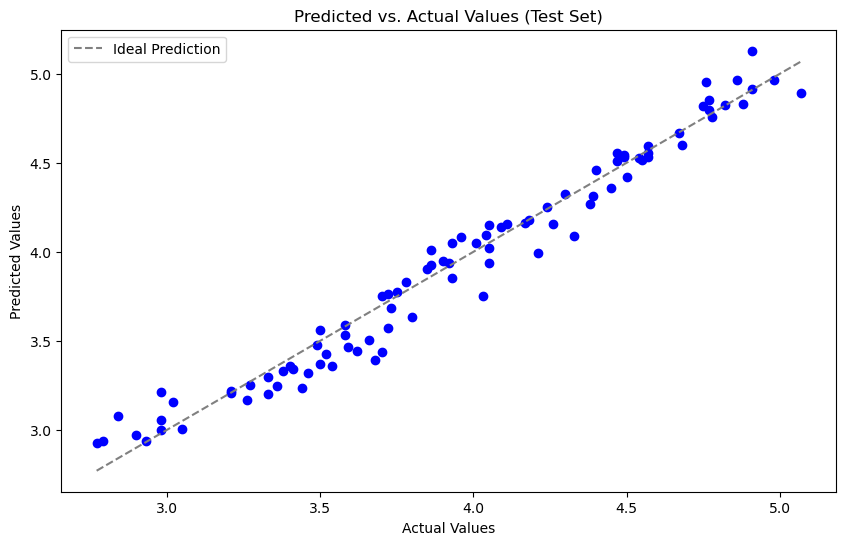

In [22]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [23]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.11160869266106165
RAE: 0.1694361211071383
MAE: 0.08576702708783357
R2: 0.9652973669937948


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [24]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [25]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [26]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 2s 6ms/step - loss: 15.2682 - mae: 3.8863
Epoch 2/300
9/9 [==============================] - 0s 11ms/step - loss: 14.2060 - mae: 3.7441
Epoch 3/300
9/9 [==============================] - 0s 9ms/step - loss: 13.1840 - mae: 3.6002
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 12.2164 - mae: 3.4584
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 11.2968 - mae: 3.3169
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 10.4326 - mae: 3.1781
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 9.6217 - mae: 3.0409
Epoch 8/300
9/9 [==============================] - 0s 9ms/step - loss: 8.8544 - mae: 2.9062
Epoch 9/300
9/9 [==============================] - 0s 23ms/step - loss: 8.1407 - mae: 2.7735
Epoch 10/300
9/9 [==============================] - 0s 22ms/step - loss: 7.4602 - mae: 2.6423
Epoch 11/300
9/9 [==============================] - 0s 9ms/step - los

9/9 [==============================] - 0s 9ms/step - loss: 0.2901 - mae: 0.4291
Epoch 89/300
9/9 [==============================] - 0s 9ms/step - loss: 0.2828 - mae: 0.4233
Epoch 90/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2748 - mae: 0.4172
Epoch 91/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2679 - mae: 0.4117
Epoch 92/300
9/9 [==============================] - 0s 11ms/step - loss: 0.2604 - mae: 0.4058
Epoch 93/300
9/9 [==============================] - 0s 13ms/step - loss: 0.2526 - mae: 0.3994
Epoch 94/300
9/9 [==============================] - 0s 20ms/step - loss: 0.2461 - mae: 0.3942
Epoch 95/300
9/9 [==============================] - 0s 16ms/step - loss: 0.2388 - mae: 0.3883
Epoch 96/300
9/9 [==============================] - 0s 12ms/step - loss: 0.2321 - mae: 0.3820
Epoch 97/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2252 - mae: 0.3761
Epoch 98/300
9/9 [==============================] - 0s 8ms/step - loss: 0.21

9/9 [==============================] - 0s 10ms/step - loss: 0.0322 - mae: 0.1436
Epoch 175/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0317 - mae: 0.1424
Epoch 176/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0314 - mae: 0.1416
Epoch 177/300
9/9 [==============================] - 0s 19ms/step - loss: 0.0310 - mae: 0.1405
Epoch 178/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0306 - mae: 0.1397
Epoch 179/300
9/9 [==============================] - 0s 26ms/step - loss: 0.0304 - mae: 0.1395
Epoch 180/300
9/9 [==============================] - 0s 27ms/step - loss: 0.0299 - mae: 0.1384
Epoch 181/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0296 - mae: 0.1377
Epoch 182/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0294 - mae: 0.1370
Epoch 183/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0290 - mae: 0.1361
Epoch 184/300
9/9 [==============================] - 0s 15ms/step

9/9 [==============================] - 0s 10ms/step - loss: 0.0188 - mae: 0.1084
Epoch 261/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0188 - mae: 0.1084
Epoch 262/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0186 - mae: 0.1080
Epoch 263/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0186 - mae: 0.1079
Epoch 264/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0185 - mae: 0.1072
Epoch 265/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0185 - mae: 0.1077
Epoch 266/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0184 - mae: 0.1073
Epoch 267/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0184 - mae: 0.1072
Epoch 268/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0185 - mae: 0.1075
Epoch 269/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0182 - mae: 0.1067
Epoch 270/300
9/9 [==============================] - 0s 11ms/step - los

9/9 [==============================] - 0s 12ms/step - loss: 0.7459 - mae: 0.6497
Epoch 48/300
9/9 [==============================] - 0s 16ms/step - loss: 0.7248 - mae: 0.6393
Epoch 49/300
9/9 [==============================] - 0s 10ms/step - loss: 0.7058 - mae: 0.6296
Epoch 50/300
9/9 [==============================] - 0s 12ms/step - loss: 0.6882 - mae: 0.6203
Epoch 51/300
9/9 [==============================] - 0s 19ms/step - loss: 0.6702 - mae: 0.6105
Epoch 52/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6527 - mae: 0.6013
Epoch 53/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6353 - mae: 0.5915
Epoch 54/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6181 - mae: 0.5817
Epoch 55/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6017 - mae: 0.5723
Epoch 56/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5852 - mae: 0.5627
Epoch 57/300
9/9 [==============================] - 0s 8ms/step - loss: 0.56

9/9 [==============================] - 0s 14ms/step - loss: 0.1098 - mae: 0.1665
Epoch 135/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1084 - mae: 0.1646
Epoch 136/300
9/9 [==============================] - 0s 18ms/step - loss: 0.1071 - mae: 0.1630
Epoch 137/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1058 - mae: 0.1618
Epoch 138/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1046 - mae: 0.1602
Epoch 139/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1033 - mae: 0.1585
Epoch 140/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1022 - mae: 0.1574
Epoch 141/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1010 - mae: 0.1556
Epoch 142/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0999 - mae: 0.1542
Epoch 143/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0988 - mae: 0.1529
Epoch 144/300
9/9 [==============================] - 0s 8ms/step - lo

9/9 [==============================] - 0s 8ms/step - loss: 0.0579 - mae: 0.1064
Epoch 221/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0576 - mae: 0.1061
Epoch 222/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0573 - mae: 0.1056
Epoch 223/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0570 - mae: 0.1054
Epoch 224/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0567 - mae: 0.1051
Epoch 225/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0564 - mae: 0.1049
Epoch 226/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0561 - mae: 0.1046
Epoch 227/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0558 - mae: 0.1043
Epoch 228/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0556 - mae: 0.1042
Epoch 229/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0553 - mae: 0.1040
Epoch 230/300
9/9 [==============================] - 0s 8ms/step - los

9/9 [==============================] - 0s 8ms/step - loss: 8.7905 - mae: 2.8784
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 8.0936 - mae: 2.7553
Epoch 8/300
9/9 [==============================] - 0s 9ms/step - loss: 7.4373 - mae: 2.6327
Epoch 9/300
9/9 [==============================] - 0s 8ms/step - loss: 6.7906 - mae: 2.5054
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 6.1776 - mae: 2.3763
Epoch 11/300
9/9 [==============================] - 0s 9ms/step - loss: 5.6050 - mae: 2.2474
Epoch 12/300
9/9 [==============================] - 0s 11ms/step - loss: 5.0788 - mae: 2.1180
Epoch 13/300
9/9 [==============================] - 0s 6ms/step - loss: 4.5748 - mae: 1.9866
Epoch 14/300
9/9 [==============================] - 0s 6ms/step - loss: 4.1278 - mae: 1.8589
Epoch 15/300
9/9 [==============================] - 0s 7ms/step - loss: 3.7157 - mae: 1.7316
Epoch 16/300
9/9 [==============================] - 0s 12ms/step - loss: 3.3516 - mae

9/9 [==============================] - 0s 7ms/step - loss: 0.2941 - mae: 0.2966
Epoch 94/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2874 - mae: 0.2909
Epoch 95/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2807 - mae: 0.2854
Epoch 96/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2746 - mae: 0.2798
Epoch 97/300
9/9 [==============================] - 0s 9ms/step - loss: 0.2686 - mae: 0.2746
Epoch 98/300
9/9 [==============================] - 0s 9ms/step - loss: 0.2624 - mae: 0.2696
Epoch 99/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2568 - mae: 0.2652
Epoch 100/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2512 - mae: 0.2598
Epoch 101/300
9/9 [==============================] - 0s 11ms/step - loss: 0.2460 - mae: 0.2554
Epoch 102/300
9/9 [==============================] - 0s 13ms/step - loss: 0.2409 - mae: 0.2507
Epoch 103/300
9/9 [==============================] - 0s 9ms/step - loss: 0.23

9/9 [==============================] - 0s 8ms/step - loss: 0.0898 - mae: 0.1201
Epoch 180/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0889 - mae: 0.1196
Epoch 181/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0882 - mae: 0.1188
Epoch 182/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0874 - mae: 0.1185
Epoch 183/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0866 - mae: 0.1186
Epoch 184/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0858 - mae: 0.1183
Epoch 185/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0852 - mae: 0.1178
Epoch 186/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0844 - mae: 0.1171
Epoch 187/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0836 - mae: 0.1169
Epoch 188/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0829 - mae: 0.1166
Epoch 189/300
9/9 [==============================] - 0s 9ms/step - l

9/9 [==============================] - 0s 19ms/step - loss: 0.0469 - mae: 0.1074
Epoch 266/300
9/9 [==============================] - 1s 113ms/step - loss: 0.0466 - mae: 0.1072
Epoch 267/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0463 - mae: 0.1071
Epoch 268/300
9/9 [==============================] - 0s 31ms/step - loss: 0.0460 - mae: 0.1073
Epoch 269/300
9/9 [==============================] - 0s 28ms/step - loss: 0.0457 - mae: 0.1071
Epoch 270/300
9/9 [==============================] - 0s 45ms/step - loss: 0.0454 - mae: 0.1070
Epoch 271/300
9/9 [==============================] - 0s 27ms/step - loss: 0.0451 - mae: 0.1075
Epoch 272/300
9/9 [==============================] - 0s 37ms/step - loss: 0.0448 - mae: 0.1073
Epoch 273/300
9/9 [==============================] - 0s 29ms/step - loss: 0.0446 - mae: 0.1071
Epoch 274/300
9/9 [==============================] - 0s 27ms/step - loss: 0.0443 - mae: 0.1069
Epoch 275/300
9/9 [==============================] - 0s 30ms/st

9/9 [==============================] - 0s 7ms/step - loss: 0.8308 - mae: 0.4616
Epoch 52/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8024 - mae: 0.4477
Epoch 53/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7753 - mae: 0.4338
Epoch 54/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7487 - mae: 0.4203
Epoch 55/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7236 - mae: 0.4071
Epoch 56/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6996 - mae: 0.3943
Epoch 57/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6765 - mae: 0.3815
Epoch 58/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6543 - mae: 0.3692
Epoch 59/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6332 - mae: 0.3577
Epoch 60/300
9/9 [==============================] - 0s 12ms/step - loss: 0.6131 - mae: 0.3459
Epoch 61/300
9/9 [==============================] - 0s 16ms/step - loss: 0.5939 - 

9/9 [==============================] - 0s 6ms/step - loss: 0.1145 - mae: 0.1153
Epoch 139/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1126 - mae: 0.1148
Epoch 140/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1107 - mae: 0.1142
Epoch 141/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1088 - mae: 0.1138
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1070 - mae: 0.1135
Epoch 143/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1052 - mae: 0.1131
Epoch 144/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1035 - mae: 0.1127
Epoch 145/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1019 - mae: 0.1131
Epoch 146/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1002 - mae: 0.1129
Epoch 147/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0986 - mae: 0.1122
Epoch 148/300
9/9 [==============================] - 0s 8ms/step - loss:

Epoch 225/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0409 - mae: 0.1128
Epoch 226/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0406 - mae: 0.1123
Epoch 227/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0403 - mae: 0.1123
Epoch 228/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0400 - mae: 0.1119
Epoch 229/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0398 - mae: 0.1124
Epoch 230/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0395 - mae: 0.1123
Epoch 231/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0393 - mae: 0.1124
Epoch 232/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0391 - mae: 0.1124
Epoch 233/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0389 - mae: 0.1125
Epoch 234/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0387 - mae: 0.1124
Epoch 235/300
9/9 [==============================] - 0s 14ms

9/9 [==============================] - 0s 6ms/step - loss: 8.7937 - mae: 2.6347
Epoch 12/300
9/9 [==============================] - 0s 10ms/step - loss: 8.2305 - mae: 2.5182
Epoch 13/300
9/9 [==============================] - 0s 8ms/step - loss: 7.6853 - mae: 2.4004
Epoch 14/300
9/9 [==============================] - 0s 12ms/step - loss: 7.1686 - mae: 2.2807
Epoch 15/300
9/9 [==============================] - 0s 10ms/step - loss: 6.6801 - mae: 2.1595
Epoch 16/300
9/9 [==============================] - 0s 8ms/step - loss: 6.2273 - mae: 2.0401
Epoch 17/300
9/9 [==============================] - 0s 9ms/step - loss: 5.8003 - mae: 1.9220
Epoch 18/300
9/9 [==============================] - 0s 8ms/step - loss: 5.4098 - mae: 1.8065
Epoch 19/300
9/9 [==============================] - 0s 7ms/step - loss: 5.0567 - mae: 1.7008
Epoch 20/300
9/9 [==============================] - 0s 7ms/step - loss: 4.7322 - mae: 1.6001
Epoch 21/300
9/9 [==============================] - 0s 10ms/step - loss: 4.4419 

9/9 [==============================] - 0s 6ms/step - loss: 0.1579 - mae: 0.1273
Epoch 99/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1534 - mae: 0.1266
Epoch 100/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - mae: 0.1255
Epoch 101/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1447 - mae: 0.1249
Epoch 102/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1407 - mae: 0.1244
Epoch 103/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1370 - mae: 0.1238
Epoch 104/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1332 - mae: 0.1230
Epoch 105/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1296 - mae: 0.1223
Epoch 106/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1262 - mae: 0.1218
Epoch 107/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1228 - mae: 0.1214
Epoch 108/300
9/9 [==============================] - 0s 12ms/step - loss: 

9/9 [==============================] - 0s 7ms/step - loss: 0.0412 - mae: 0.1196
Epoch 185/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0410 - mae: 0.1197
Epoch 186/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0408 - mae: 0.1201
Epoch 187/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0408 - mae: 0.1203
Epoch 188/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0406 - mae: 0.1208
Epoch 189/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0404 - mae: 0.1206
Epoch 190/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0403 - mae: 0.1203
Epoch 191/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0402 - mae: 0.1211
Epoch 192/300
9/9 [==============================] - 0s 19ms/step - loss: 0.0401 - mae: 0.1205
Epoch 193/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0399 - mae: 0.1207
Epoch 194/300
9/9 [==============================] - 0s 11ms/step - los

9/9 [==============================] - 0s 6ms/step - loss: 0.0370 - mae: 0.1230
Epoch 271/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0369 - mae: 0.1232
Epoch 272/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0370 - mae: 0.1235
Epoch 273/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0370 - mae: 0.1231
Epoch 274/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0369 - mae: 0.1233
Epoch 275/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0370 - mae: 0.1237
Epoch 276/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0371 - mae: 0.1234
Epoch 277/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0371 - mae: 0.1230
Epoch 278/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0369 - mae: 0.1229
Epoch 279/300
9/9 [==============================] - 0s 21ms/step - loss: 0.0370 - mae: 0.1232
Epoch 280/300
9/9 [==============================] - 0s 13ms/step - 

9/9 [==============================] - 0s 8ms/step - loss: 1.3763 - mae: 0.4828
Epoch 58/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3090 - mae: 0.4628
Epoch 59/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2447 - mae: 0.4437
Epoch 60/300
9/9 [==============================] - 0s 9ms/step - loss: 1.1847 - mae: 0.4262
Epoch 61/300
9/9 [==============================] - 0s 8ms/step - loss: 1.1276 - mae: 0.4099
Epoch 62/300
9/9 [==============================] - 0s 6ms/step - loss: 1.0722 - mae: 0.3936
Epoch 63/300
9/9 [==============================] - 0s 7ms/step - loss: 1.0199 - mae: 0.3773
Epoch 64/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9709 - mae: 0.3634
Epoch 65/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9224 - mae: 0.3483
Epoch 66/300
9/9 [==============================] - 0s 8ms/step - loss: 0.8768 - mae: 0.3331
Epoch 67/300
9/9 [==============================] - 0s 16ms/step - loss: 0.8336 -

9/9 [==============================] - 0s 8ms/step - loss: 0.0680 - mae: 0.1339
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0669 - mae: 0.1344
Epoch 146/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0660 - mae: 0.1347
Epoch 147/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0652 - mae: 0.1347
Epoch 148/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0644 - mae: 0.1352
Epoch 149/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0637 - mae: 0.1353
Epoch 150/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0629 - mae: 0.1353
Epoch 151/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0622 - mae: 0.1359
Epoch 152/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0615 - mae: 0.1363
Epoch 153/300
9/9 [==============================] - 0s 18ms/step - loss: 0.0609 - mae: 0.1359
Epoch 154/300
9/9 [==============================] - 0s 11ms/step - l

9/9 [==============================] - 0s 9ms/step - loss: 0.0460 - mae: 0.1403
Epoch 231/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0461 - mae: 0.1393
Epoch 232/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0461 - mae: 0.1386
Epoch 233/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0459 - mae: 0.1387
Epoch 234/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0459 - mae: 0.1389
Epoch 235/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0460 - mae: 0.1388
Epoch 236/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0460 - mae: 0.1394
Epoch 237/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0458 - mae: 0.1394
Epoch 238/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0458 - mae: 0.1388
Epoch 239/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0458 - mae: 0.1381
Epoch 240/300
9/9 [==============================] - 0s 9ms/step - los

In [27]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 6ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.02, CV MSE: 0.01


In [32]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 4
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [33]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.78          3.841135
1           3.86          4.192708
2           3.38          3.317444
3           3.70          3.760985
4           3.72          3.650225
5           4.54          4.334471
6           4.49          4.371356

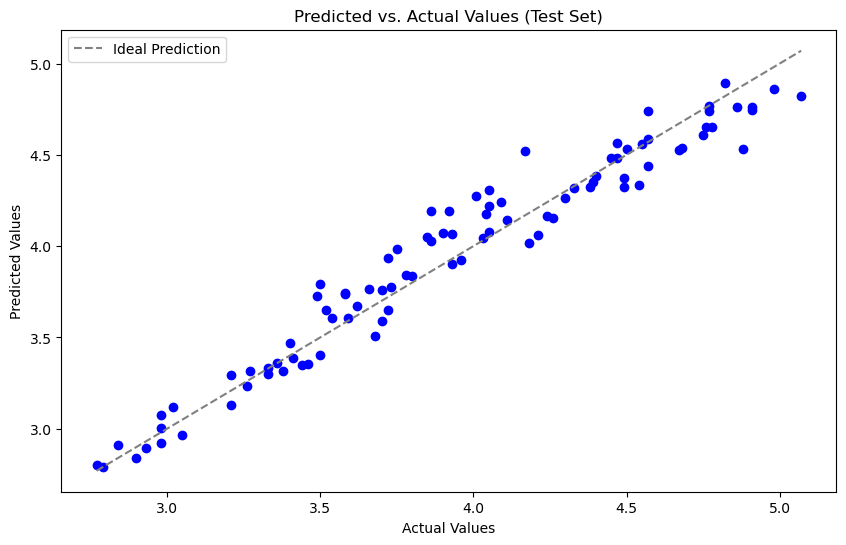

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13507843200984176
RAE: 0.2099740918928496
MAE: 0.10628698006920191
R2: 0.9491678584541352


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [36]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [37]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [38]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 3s 5ms/step - loss: 15.7885 - mae: 3.8356
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 14.7547 - mae: 3.7052
Epoch 3/300
9/9 [==============================] - 0s 9ms/step - loss: 13.7602 - mae: 3.5754
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 12.8101 - mae: 3.4471
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 11.9152 - mae: 3.3210
Epoch 6/300
9/9 [==============================] - 0s 12ms/step - loss: 11.0813 - mae: 3.1968
Epoch 7/300
9/9 [==============================] - 0s 11ms/step - loss: 10.2548 - mae: 3.0704
Epoch 8/300
9/9 [==============================] - 0s 26ms/step - loss: 9.4792 - mae: 2.9445
Epoch 9/300
9/9 [==============================] - 0s 12ms/step - loss: 8.7117 - mae: 2.8151
Epoch 10/300
9/9 [==============================] - 0s 11ms/step - loss: 7.9988 - mae: 2.6872
Epoch 11/300
9/9 [==============================] - 0s 9ms/step - l

9/9 [==============================] - 0s 6ms/step - loss: 0.1204 - mae: 0.2852
Epoch 89/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1141 - mae: 0.2769
Epoch 90/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1080 - mae: 0.2689
Epoch 91/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1025 - mae: 0.2609
Epoch 92/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0972 - mae: 0.2537
Epoch 93/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0924 - mae: 0.2467
Epoch 94/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0881 - mae: 0.2405
Epoch 95/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0838 - mae: 0.2341
Epoch 96/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0802 - mae: 0.2282
Epoch 97/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0767 - mae: 0.2229
Epoch 98/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0733

Epoch 175/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0239 - mae: 0.1215
Epoch 176/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0238 - mae: 0.1212
Epoch 177/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0237 - mae: 0.1209
Epoch 178/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0236 - mae: 0.1205
Epoch 179/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0236 - mae: 0.1201
Epoch 180/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0234 - mae: 0.1197
Epoch 181/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0234 - mae: 0.1201
Epoch 182/300
9/9 [==============================] - 0s 16ms/step - loss: 0.0233 - mae: 0.1198
Epoch 183/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0232 - mae: 0.1194
Epoch 184/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0232 - mae: 0.1187
Epoch 185/300
9/9 [==============================] - 0s

9/9 [==============================] - 0s 7ms/step - loss: 0.0193 - mae: 0.1067
Epoch 262/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0193 - mae: 0.1065
Epoch 263/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0193 - mae: 0.1067
Epoch 264/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0193 - mae: 0.1063
Epoch 265/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0192 - mae: 0.1059
Epoch 266/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0192 - mae: 0.1062
Epoch 267/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0191 - mae: 0.1059
Epoch 268/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0193 - mae: 0.1065
Epoch 269/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0191 - mae: 0.1057
Epoch 270/300
9/9 [==============================] - 0s 19ms/step - loss: 0.0192 - mae: 0.1061
Epoch 271/300
9/9 [==============================] - 0s 11ms/step - loss:

9/9 [==============================] - 0s 12ms/step - loss: 1.0371 - mae: 0.7805
Epoch 49/300
9/9 [==============================] - 0s 9ms/step - loss: 1.0045 - mae: 0.7671
Epoch 50/300
9/9 [==============================] - 0s 7ms/step - loss: 0.9715 - mae: 0.7539
Epoch 51/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9399 - mae: 0.7412
Epoch 52/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9091 - mae: 0.7279
Epoch 53/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8783 - mae: 0.7150
Epoch 54/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8495 - mae: 0.7025
Epoch 55/300
9/9 [==============================] - 0s 12ms/step - loss: 0.8195 - mae: 0.6890
Epoch 56/300
9/9 [==============================] - 0s 11ms/step - loss: 0.7915 - mae: 0.6758
Epoch 57/300
9/9 [==============================] - 0s 12ms/step - loss: 0.7640 - mae: 0.6626
Epoch 58/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7370

9/9 [==============================] - 0s 9ms/step - loss: 0.0886 - mae: 0.1487
Epoch 136/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0877 - mae: 0.1469
Epoch 137/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0867 - mae: 0.1449
Epoch 138/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0859 - mae: 0.1432
Epoch 139/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0850 - mae: 0.1416
Epoch 140/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0843 - mae: 0.1405
Epoch 141/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0835 - mae: 0.1388
Epoch 142/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0829 - mae: 0.1373
Epoch 143/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0823 - mae: 0.1362
Epoch 144/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0814 - mae: 0.1345
Epoch 145/300
9/9 [==============================] - 0s 8ms/step - lo

9/9 [==============================] - 0s 7ms/step - loss: 0.0601 - mae: 0.1075
Epoch 222/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0600 - mae: 0.1079
Epoch 223/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0598 - mae: 0.1076
Epoch 224/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0596 - mae: 0.1075
Epoch 225/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0594 - mae: 0.1073
Epoch 226/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0592 - mae: 0.1071
Epoch 227/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0590 - mae: 0.1073
Epoch 228/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0589 - mae: 0.1072
Epoch 229/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0587 - mae: 0.1069
Epoch 230/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0585 - mae: 0.1069
Epoch 231/300
9/9 [==============================] - 0s 7ms/step - loss

9/9 [==============================] - 0s 18ms/step - loss: 9.6678 - mae: 2.8561
Epoch 8/300
9/9 [==============================] - 0s 9ms/step - loss: 9.0324 - mae: 2.7410
Epoch 9/300
9/9 [==============================] - 0s 9ms/step - loss: 8.4220 - mae: 2.6256
Epoch 10/300
9/9 [==============================] - 0s 8ms/step - loss: 7.8460 - mae: 2.5158
Epoch 11/300
9/9 [==============================] - 0s 7ms/step - loss: 7.2636 - mae: 2.4100
Epoch 12/300
9/9 [==============================] - 0s 8ms/step - loss: 6.7169 - mae: 2.3062
Epoch 13/300
9/9 [==============================] - 0s 8ms/step - loss: 6.1700 - mae: 2.2043
Epoch 14/300
9/9 [==============================] - 0s 8ms/step - loss: 5.6537 - mae: 2.1052
Epoch 15/300
9/9 [==============================] - 0s 8ms/step - loss: 5.1352 - mae: 2.0014
Epoch 16/300
9/9 [==============================] - 0s 8ms/step - loss: 4.6412 - mae: 1.8971
Epoch 17/300
9/9 [==============================] - 0s 8ms/step - loss: 4.1697 - mae

9/9 [==============================] - 0s 14ms/step - loss: 0.1831 - mae: 0.2111
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1796 - mae: 0.2077
Epoch 96/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1765 - mae: 0.2044
Epoch 97/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1733 - mae: 0.2013
Epoch 98/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1703 - mae: 0.1985
Epoch 99/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1675 - mae: 0.1960
Epoch 100/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1648 - mae: 0.1934
Epoch 101/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1618 - mae: 0.1899
Epoch 102/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1593 - mae: 0.1878
Epoch 103/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1566 - mae: 0.1848
Epoch 104/300
9/9 [==============================] - 0s 9ms/step - loss: 0.154

9/9 [==============================] - 0s 12ms/step - loss: 0.0672 - mae: 0.1139
Epoch 181/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0667 - mae: 0.1139
Epoch 182/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0661 - mae: 0.1139
Epoch 183/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0656 - mae: 0.1135
Epoch 184/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0651 - mae: 0.1135
Epoch 185/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0646 - mae: 0.1134
Epoch 186/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0641 - mae: 0.1134
Epoch 187/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0635 - mae: 0.1131
Epoch 188/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0632 - mae: 0.1134
Epoch 189/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0626 - mae: 0.1134
Epoch 190/300
9/9 [==============================] - 0s 11ms/step - loss

9/9 [==============================] - 0s 9ms/step - loss: 0.0385 - mae: 0.1107
Epoch 267/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0383 - mae: 0.1109
Epoch 268/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0381 - mae: 0.1104
Epoch 269/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0380 - mae: 0.1106
Epoch 270/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0379 - mae: 0.1108
Epoch 271/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0376 - mae: 0.1110
Epoch 272/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0374 - mae: 0.1107
Epoch 273/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0373 - mae: 0.1109
Epoch 274/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0371 - mae: 0.1107
Epoch 275/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0369 - mae: 0.1108
Epoch 276/300
9/9 [==============================] - 0s 14ms/step - los

9/9 [==============================] - 0s 10ms/step - loss: 0.8679 - mae: 0.5273
Epoch 54/300
9/9 [==============================] - 0s 13ms/step - loss: 0.8335 - mae: 0.5098
Epoch 55/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8021 - mae: 0.4935
Epoch 56/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7723 - mae: 0.4778
Epoch 57/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7434 - mae: 0.4622
Epoch 58/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7171 - mae: 0.4482
Epoch 59/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6905 - mae: 0.4335
Epoch 60/300
9/9 [==============================] - 0s 25ms/step - loss: 0.6650 - mae: 0.4196
Epoch 61/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6419 - mae: 0.4071
Epoch 62/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6200 - mae: 0.3950
Epoch 63/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5987

9/9 [==============================] - 0s 6ms/step - loss: 0.1171 - mae: 0.1155
Epoch 141/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1155 - mae: 0.1156
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1139 - mae: 0.1163
Epoch 143/300
9/9 [==============================] - 0s 13ms/step - loss: 0.1122 - mae: 0.1160
Epoch 144/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1107 - mae: 0.1160
Epoch 145/300
9/9 [==============================] - 0s 13ms/step - loss: 0.1090 - mae: 0.1161
Epoch 146/300
9/9 [==============================] - 0s 13ms/step - loss: 0.1075 - mae: 0.1163
Epoch 147/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1060 - mae: 0.1167
Epoch 148/300
9/9 [==============================] - 0s 13ms/step - loss: 0.1045 - mae: 0.1166
Epoch 149/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1031 - mae: 0.1165
Epoch 150/300
9/9 [==============================] - 0s 8ms/step -

9/9 [==============================] - 0s 8ms/step - loss: 0.0459 - mae: 0.1277
Epoch 227/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0457 - mae: 0.1277
Epoch 228/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0453 - mae: 0.1277
Epoch 229/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0450 - mae: 0.1280
Epoch 230/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0448 - mae: 0.1285
Epoch 231/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0444 - mae: 0.1281
Epoch 232/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0442 - mae: 0.1280
Epoch 233/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0440 - mae: 0.1284
Epoch 234/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0437 - mae: 0.1284
Epoch 235/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0435 - mae: 0.1287
Epoch 236/300
9/9 [==============================] - 0s 9ms/step - loss

9/9 [==============================] - 0s 9ms/step - loss: 8.6631 - mae: 2.6750
Epoch 13/300
9/9 [==============================] - 0s 9ms/step - loss: 8.0749 - mae: 2.5561
Epoch 14/300
9/9 [==============================] - 0s 10ms/step - loss: 7.5131 - mae: 2.4358
Epoch 15/300
9/9 [==============================] - 0s 17ms/step - loss: 6.9821 - mae: 2.3153
Epoch 16/300
9/9 [==============================] - 0s 13ms/step - loss: 6.4812 - mae: 2.1959
Epoch 17/300
9/9 [==============================] - 0s 13ms/step - loss: 6.0253 - mae: 2.0799
Epoch 18/300
9/9 [==============================] - 0s 9ms/step - loss: 5.5913 - mae: 1.9621
Epoch 19/300
9/9 [==============================] - 0s 10ms/step - loss: 5.2046 - mae: 1.8490
Epoch 20/300
9/9 [==============================] - 0s 11ms/step - loss: 4.8504 - mae: 1.7406
Epoch 21/300
9/9 [==============================] - 0s 12ms/step - loss: 4.5340 - mae: 1.6363
Epoch 22/300
9/9 [==============================] - 0s 9ms/step - loss: 4.25

9/9 [==============================] - 0s 9ms/step - loss: 0.2204 - mae: 0.1446
Epoch 100/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2149 - mae: 0.1430
Epoch 101/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2095 - mae: 0.1415
Epoch 102/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2042 - mae: 0.1398
Epoch 103/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1991 - mae: 0.1386
Epoch 104/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1943 - mae: 0.1377
Epoch 105/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1896 - mae: 0.1366
Epoch 106/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1850 - mae: 0.1357
Epoch 107/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1806 - mae: 0.1349
Epoch 108/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1764 - mae: 0.1340
Epoch 109/300
9/9 [==============================] - 0s 9ms/step - loss:

Epoch 186/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0518 - mae: 0.1332
Epoch 187/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0514 - mae: 0.1332
Epoch 188/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0513 - mae: 0.1335
Epoch 189/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0507 - mae: 0.1335
Epoch 190/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0503 - mae: 0.1335
Epoch 191/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0500 - mae: 0.1331
Epoch 192/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0497 - mae: 0.1331
Epoch 193/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0494 - mae: 0.1334
Epoch 194/300
9/9 [==============================] - 0s 16ms/step - loss: 0.0491 - mae: 0.1334
Epoch 195/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0492 - mae: 0.1352
Epoch 196/300
9/9 [==============================] - 0s

9/9 [==============================] - 0s 10ms/step - loss: 0.0418 - mae: 0.1360
Epoch 273/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0417 - mae: 0.1359
Epoch 274/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0419 - mae: 0.1375
Epoch 275/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0417 - mae: 0.1369
Epoch 276/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0418 - mae: 0.1361
Epoch 277/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0416 - mae: 0.1361
Epoch 278/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0417 - mae: 0.1374
Epoch 279/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0416 - mae: 0.1370
Epoch 280/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0416 - mae: 0.1366
Epoch 281/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0416 - mae: 0.1363
Epoch 282/300
9/9 [==============================] - 0s 8ms/step - lo

9/9 [==============================] - 0s 5ms/step - loss: 1.3242 - mae: 0.5302
Epoch 60/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2735 - mae: 0.5144
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2233 - mae: 0.4982
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 1.1755 - mae: 0.4827
Epoch 63/300
9/9 [==============================] - 0s 9ms/step - loss: 1.1294 - mae: 0.4681
Epoch 64/300
9/9 [==============================] - 0s 8ms/step - loss: 1.0842 - mae: 0.4532
Epoch 65/300
9/9 [==============================] - 0s 7ms/step - loss: 1.0415 - mae: 0.4388
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0006 - mae: 0.4249
Epoch 67/300
9/9 [==============================] - 0s 8ms/step - loss: 0.9618 - mae: 0.4121
Epoch 68/300
9/9 [==============================] - 0s 7ms/step - loss: 0.9225 - mae: 0.3989
Epoch 69/300
9/9 [==============================] - 0s 8ms/step - loss: 0.8865 - ma

9/9 [==============================] - 0s 11ms/step - loss: 0.0850 - mae: 0.1383
Epoch 147/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0836 - mae: 0.1385
Epoch 148/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0821 - mae: 0.1386
Epoch 149/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0808 - mae: 0.1387
Epoch 150/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0795 - mae: 0.1385
Epoch 151/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0782 - mae: 0.1387
Epoch 152/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0771 - mae: 0.1388
Epoch 153/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0759 - mae: 0.1388
Epoch 154/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0748 - mae: 0.1389
Epoch 155/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0737 - mae: 0.1390
Epoch 156/300
9/9 [==============================] - 0s 18ms/step - 

9/9 [==============================] - 0s 6ms/step - loss: 0.0469 - mae: 0.1426
Epoch 233/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0469 - mae: 0.1425
Epoch 234/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0469 - mae: 0.1429
Epoch 235/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0469 - mae: 0.1435
Epoch 236/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0468 - mae: 0.1425
Epoch 237/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0469 - mae: 0.1435
Epoch 238/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0467 - mae: 0.1430
Epoch 239/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0466 - mae: 0.1426
Epoch 240/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0467 - mae: 0.1425
Epoch 241/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0466 - mae: 0.1426
Epoch 242/300
9/9 [==============================] - 0s 7ms/step - loss

In [39]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 6ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.02, CV MSE: 0.01


In [40]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 5
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [41]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.78          3.811608
1           3.86          4.170757
2           3.38          3.366961
3           3.70          3.751427
4           3.72          3.674059
5           4.54          4.305870
6           4.49          4.308825

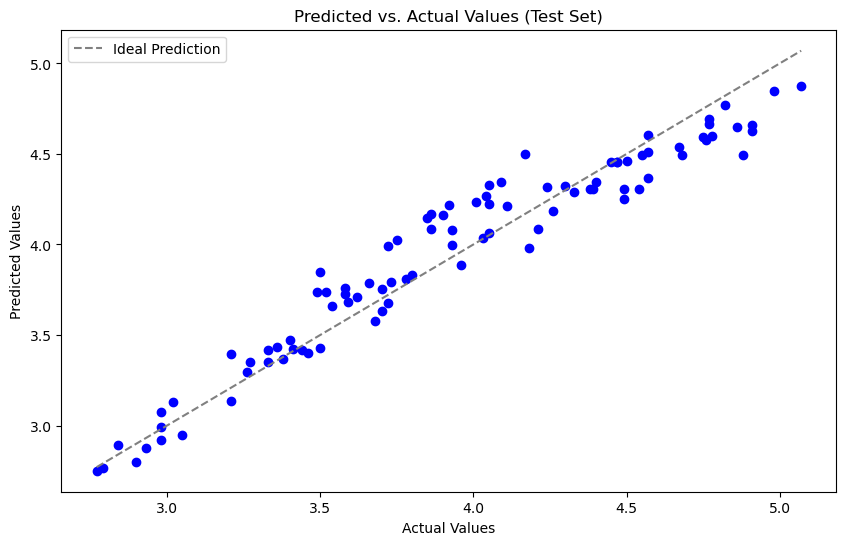

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15748579813427863
RAE: 0.24901437884941452
MAE: 0.12604881908582605
R2: 0.9309045933799664


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [44]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [45]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [46]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 2s 6ms/step - loss: 15.8496 - mae: 3.8279
Epoch 2/300
9/9 [==============================] - 0s 11ms/step - loss: 15.0490 - mae: 3.7211
Epoch 3/300
9/9 [==============================] - 0s 14ms/step - loss: 14.2780 - mae: 3.6129
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 13.5298 - mae: 3.5061
Epoch 5/300
9/9 [==============================] - 0s 15ms/step - loss: 12.8187 - mae: 3.4013
Epoch 6/300
9/9 [==============================] - 0s 16ms/step - loss: 12.1278 - mae: 3.2976
Epoch 7/300
9/9 [==============================] - 0s 19ms/step - loss: 11.4375 - mae: 3.1947
Epoch 8/300
9/9 [==============================] - 0s 9ms/step - loss: 10.7872 - mae: 3.0933
Epoch 9/300
9/9 [==============================] - 0s 7ms/step - loss: 10.1404 - mae: 2.9919
Epoch 10/300
9/9 [==============================] - 0s 11ms/step - loss: 9.5168 - mae: 2.8910
Epoch 11/300
9/9 [==============================] - 0s 10ms/step

9/9 [==============================] - 0s 6ms/step - loss: 0.1410 - mae: 0.2959
Epoch 89/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1365 - mae: 0.2907
Epoch 90/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1316 - mae: 0.2848
Epoch 91/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1271 - mae: 0.2790
Epoch 92/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1229 - mae: 0.2736
Epoch 93/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1192 - mae: 0.2685
Epoch 94/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1154 - mae: 0.2633
Epoch 95/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1117 - mae: 0.2588
Epoch 96/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1082 - mae: 0.2542
Epoch 97/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1050 - mae: 0.2499
Epoch 98/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1017 -

9/9 [==============================] - 0s 7ms/step - loss: 0.0408 - mae: 0.1615
Epoch 176/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0406 - mae: 0.1611
Epoch 177/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0405 - mae: 0.1607
Epoch 178/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0404 - mae: 0.1603
Epoch 179/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0402 - mae: 0.1600
Epoch 180/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0402 - mae: 0.1601
Epoch 181/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0400 - mae: 0.1597
Epoch 182/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0399 - mae: 0.1595
Epoch 183/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0398 - mae: 0.1593
Epoch 184/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0396 - mae: 0.1589
Epoch 185/300
9/9 [==============================] - 0s 9ms/step - 

9/9 [==============================] - 0s 17ms/step - loss: 0.0350 - mae: 0.1472
Epoch 262/300
9/9 [==============================] - 0s 19ms/step - loss: 0.0351 - mae: 0.1474
Epoch 263/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0350 - mae: 0.1474
Epoch 264/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0349 - mae: 0.1470
Epoch 265/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0349 - mae: 0.1469
Epoch 266/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0348 - mae: 0.1470
Epoch 267/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0349 - mae: 0.1470
Epoch 268/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0347 - mae: 0.1465
Epoch 269/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0347 - mae: 0.1463
Epoch 270/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0347 - mae: 0.1463
Epoch 271/300
9/9 [==============================] - 0s 8ms/step - l

9/9 [==============================] - 0s 12ms/step - loss: 0.7446 - mae: 0.6844
Epoch 49/300
9/9 [==============================] - 0s 12ms/step - loss: 0.7290 - mae: 0.6759
Epoch 50/300
9/9 [==============================] - 0s 19ms/step - loss: 0.7142 - mae: 0.6679
Epoch 51/300
9/9 [==============================] - 0s 16ms/step - loss: 0.6993 - mae: 0.6599
Epoch 52/300
9/9 [==============================] - 0s 11ms/step - loss: 0.6860 - mae: 0.6527
Epoch 53/300
9/9 [==============================] - 0s 11ms/step - loss: 0.6719 - mae: 0.6450
Epoch 54/300
9/9 [==============================] - 0s 11ms/step - loss: 0.6585 - mae: 0.6376
Epoch 55/300
9/9 [==============================] - 0s 11ms/step - loss: 0.6451 - mae: 0.6304
Epoch 56/300
9/9 [==============================] - 0s 12ms/step - loss: 0.6322 - mae: 0.6231
Epoch 57/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6191 - mae: 0.6157
Epoch 58/300
9/9 [==============================] - 0s 8ms/step - loss: 0

9/9 [==============================] - 0s 7ms/step - loss: 0.1073 - mae: 0.1908
Epoch 136/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1061 - mae: 0.1896
Epoch 137/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1050 - mae: 0.1883
Epoch 138/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1039 - mae: 0.1871
Epoch 139/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1028 - mae: 0.1859
Epoch 140/300
9/9 [==============================] - 0s 18ms/step - loss: 0.1018 - mae: 0.1846
Epoch 141/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1008 - mae: 0.1833
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0998 - mae: 0.1821
Epoch 143/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0989 - mae: 0.1811
Epoch 144/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0981 - mae: 0.1802
Epoch 145/300
9/9 [==============================] - 0s 8ms/step - loss:

9/9 [==============================] - 0s 7ms/step - loss: 0.0667 - mae: 0.1487
Epoch 223/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0665 - mae: 0.1485
Epoch 224/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0663 - mae: 0.1485
Epoch 225/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0661 - mae: 0.1486
Epoch 226/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0659 - mae: 0.1483
Epoch 227/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0657 - mae: 0.1483
Epoch 228/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0655 - mae: 0.1480
Epoch 229/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0653 - mae: 0.1477
Epoch 230/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0652 - mae: 0.1477
Epoch 231/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0650 - mae: 0.1475
Epoch 232/300
9/9 [==============================] - 0s 6ms/step - loss

9/9 [==============================] - 0s 7ms/step - loss: 9.9120 - mae: 3.1027
Epoch 9/300
9/9 [==============================] - 0s 7ms/step - loss: 9.2836 - mae: 2.9977
Epoch 10/300
9/9 [==============================] - 0s 8ms/step - loss: 8.6810 - mae: 2.8936
Epoch 11/300
9/9 [==============================] - 0s 11ms/step - loss: 8.0875 - mae: 2.7857
Epoch 12/300
9/9 [==============================] - 0s 8ms/step - loss: 7.5102 - mae: 2.6757
Epoch 13/300
9/9 [==============================] - 0s 7ms/step - loss: 6.9648 - mae: 2.5676
Epoch 14/300
9/9 [==============================] - 0s 8ms/step - loss: 6.4327 - mae: 2.4548
Epoch 15/300
9/9 [==============================] - 0s 7ms/step - loss: 5.9238 - mae: 2.3418
Epoch 16/300
9/9 [==============================] - 0s 7ms/step - loss: 5.4456 - mae: 2.2289
Epoch 17/300
9/9 [==============================] - 0s 17ms/step - loss: 4.9918 - mae: 2.1174
Epoch 18/300
9/9 [==============================] - 0s 11ms/step - loss: 4.5694 - 

Epoch 96/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2596 - mae: 0.2604
Epoch 97/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2551 - mae: 0.2567
Epoch 98/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2504 - mae: 0.2532
Epoch 99/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2463 - mae: 0.2503
Epoch 100/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2422 - mae: 0.2473
Epoch 101/300
9/9 [==============================] - 0s 9ms/step - loss: 0.2384 - mae: 0.2446
Epoch 102/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2345 - mae: 0.2416
Epoch 103/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2310 - mae: 0.2393
Epoch 104/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2274 - mae: 0.2368
Epoch 105/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2238 - mae: 0.2341
Epoch 106/300
9/9 [==============================] - 0s 6ms/ste

9/9 [==============================] - 0s 8ms/step - loss: 0.1058 - mae: 0.1547
Epoch 183/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1051 - mae: 0.1543
Epoch 184/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1043 - mae: 0.1539
Epoch 185/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1036 - mae: 0.1537
Epoch 186/300
9/9 [==============================] - 0s 20ms/step - loss: 0.1028 - mae: 0.1532
Epoch 187/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1022 - mae: 0.1529
Epoch 188/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1014 - mae: 0.1525
Epoch 189/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1007 - mae: 0.1521
Epoch 190/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1000 - mae: 0.1518
Epoch 191/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0993 - mae: 0.1514
Epoch 192/300
9/9 [==============================] - 0s 9ms/step - lo

9/9 [==============================] - 0s 9ms/step - loss: 0.0650 - mae: 0.1402
Epoch 269/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0648 - mae: 0.1402
Epoch 270/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0645 - mae: 0.1401
Epoch 271/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0643 - mae: 0.1401
Epoch 272/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0641 - mae: 0.1402
Epoch 273/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0639 - mae: 0.1406
Epoch 274/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0635 - mae: 0.1406
Epoch 275/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0633 - mae: 0.1404
Epoch 276/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0630 - mae: 0.1402
Epoch 277/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0628 - mae: 0.1401
Epoch 278/300
9/9 [==============================] - 0s 8ms/step - los

9/9 [==============================] - 0s 13ms/step - loss: 0.9333 - mae: 0.4894
Epoch 56/300
9/9 [==============================] - 0s 11ms/step - loss: 0.9099 - mae: 0.4798
Epoch 57/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8854 - mae: 0.4690
Epoch 58/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8630 - mae: 0.4588
Epoch 59/300
9/9 [==============================] - 0s 8ms/step - loss: 0.8405 - mae: 0.4487
Epoch 60/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8191 - mae: 0.4386
Epoch 61/300
9/9 [==============================] - 0s 15ms/step - loss: 0.7980 - mae: 0.4291
Epoch 62/300
9/9 [==============================] - 0s 19ms/step - loss: 0.7776 - mae: 0.4202
Epoch 63/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7573 - mae: 0.4105
Epoch 64/300
9/9 [==============================] - 0s 11ms/step - loss: 0.7374 - mae: 0.4000
Epoch 65/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7

9/9 [==============================] - 0s 6ms/step - loss: 0.1660 - mae: 0.1478
Epoch 143/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1637 - mae: 0.1476
Epoch 144/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1614 - mae: 0.1474
Epoch 145/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1592 - mae: 0.1474
Epoch 146/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1571 - mae: 0.1478
Epoch 147/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1550 - mae: 0.1474
Epoch 148/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1528 - mae: 0.1470
Epoch 149/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1508 - mae: 0.1470
Epoch 150/300
9/9 [==============================] - 0s 13ms/step - loss: 0.1488 - mae: 0.1468
Epoch 151/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1468 - mae: 0.1467
Epoch 152/300
9/9 [==============================] - 0s 8ms/step - loss:

9/9 [==============================] - 0s 8ms/step - loss: 0.0660 - mae: 0.1502
Epoch 229/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0656 - mae: 0.1502
Epoch 230/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0651 - mae: 0.1501
Epoch 231/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0647 - mae: 0.1505
Epoch 232/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0642 - mae: 0.1503
Epoch 233/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0638 - mae: 0.1505
Epoch 234/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0635 - mae: 0.1505
Epoch 235/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0631 - mae: 0.1507
Epoch 236/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0627 - mae: 0.1509
Epoch 237/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0625 - mae: 0.1509
Epoch 238/300
9/9 [==============================] - 0s 12ms/step - loss: 

9/9 [==============================] - 0s 19ms/step - loss: 6.5904 - mae: 2.2064
Epoch 15/300
9/9 [==============================] - 0s 11ms/step - loss: 6.0796 - mae: 2.0829
Epoch 16/300
9/9 [==============================] - 0s 11ms/step - loss: 5.5903 - mae: 1.9587
Epoch 17/300
9/9 [==============================] - 0s 9ms/step - loss: 5.1377 - mae: 1.8354
Epoch 18/300
9/9 [==============================] - 0s 16ms/step - loss: 4.7238 - mae: 1.7184
Epoch 19/300
9/9 [==============================] - 0s 10ms/step - loss: 4.3415 - mae: 1.6012
Epoch 20/300
9/9 [==============================] - 0s 11ms/step - loss: 3.9990 - mae: 1.4891
Epoch 21/300
9/9 [==============================] - 0s 7ms/step - loss: 3.6888 - mae: 1.3845
Epoch 22/300
9/9 [==============================] - 0s 10ms/step - loss: 3.4138 - mae: 1.2868
Epoch 23/300
9/9 [==============================] - 0s 10ms/step - loss: 3.1755 - mae: 1.1975
Epoch 24/300
9/9 [==============================] - 0s 8ms/step - loss: 2.9

9/9 [==============================] - 0s 11ms/step - loss: 0.1900 - mae: 0.1630
Epoch 102/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1859 - mae: 0.1628
Epoch 103/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1819 - mae: 0.1628
Epoch 104/300
9/9 [==============================] - 0s 18ms/step - loss: 0.1780 - mae: 0.1629
Epoch 105/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1743 - mae: 0.1630
Epoch 106/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1705 - mae: 0.1631
Epoch 107/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1670 - mae: 0.1632
Epoch 108/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1636 - mae: 0.1631
Epoch 109/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1602 - mae: 0.1632
Epoch 110/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1570 - mae: 0.1629
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - los

Epoch 188/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0604 - mae: 0.1632
Epoch 189/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0602 - mae: 0.1627
Epoch 190/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0599 - mae: 0.1624
Epoch 191/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0596 - mae: 0.1629
Epoch 192/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0594 - mae: 0.1631
Epoch 193/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0593 - mae: 0.1627
Epoch 194/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0591 - mae: 0.1631
Epoch 195/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0589 - mae: 0.1631
Epoch 196/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0586 - mae: 0.1629
Epoch 197/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0586 - mae: 0.1631
Epoch 198/300
9/9 [==============================] - 0s 8m

9/9 [==============================] - 0s 6ms/step - loss: 0.0516 - mae: 0.1589
Epoch 275/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0519 - mae: 0.1597
Epoch 276/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0518 - mae: 0.1598
Epoch 277/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0518 - mae: 0.1596
Epoch 278/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0516 - mae: 0.1585
Epoch 279/300
9/9 [==============================] - 0s 16ms/step - loss: 0.0518 - mae: 0.1591
Epoch 280/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0518 - mae: 0.1589
Epoch 281/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0516 - mae: 0.1591
Epoch 282/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0516 - mae: 0.1596
Epoch 283/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0520 - mae: 0.1604
Epoch 284/300
9/9 [==============================] - 0s 24ms/step - los

9/9 [==============================] - 0s 8ms/step - loss: 0.6104 - mae: 0.2269
Epoch 62/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5851 - mae: 0.2188
Epoch 63/300
9/9 [==============================] - 0s 18ms/step - loss: 0.5617 - mae: 0.2115
Epoch 64/300
9/9 [==============================] - 0s 9ms/step - loss: 0.5392 - mae: 0.2047
Epoch 65/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5178 - mae: 0.1985
Epoch 66/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4976 - mae: 0.1931
Epoch 67/300
9/9 [==============================] - 0s 10ms/step - loss: 0.4789 - mae: 0.1889
Epoch 68/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4610 - mae: 0.1850
Epoch 69/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4442 - mae: 0.1812
Epoch 70/300
9/9 [==============================] - 0s 10ms/step - loss: 0.4283 - mae: 0.1780
Epoch 71/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4130 -

9/9 [==============================] - 0s 8ms/step - loss: 0.0798 - mae: 0.1648
Epoch 149/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0790 - mae: 0.1652
Epoch 150/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0782 - mae: 0.1657
Epoch 151/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0776 - mae: 0.1662
Epoch 152/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0770 - mae: 0.1658
Epoch 153/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0762 - mae: 0.1657
Epoch 154/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0756 - mae: 0.1659
Epoch 155/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0751 - mae: 0.1658
Epoch 156/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0745 - mae: 0.1661
Epoch 157/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0739 - mae: 0.1661
Epoch 158/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 7ms/step - loss: 0.0602 - mae: 0.1684
Epoch 235/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0602 - mae: 0.1692
Epoch 236/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0603 - mae: 0.1694
Epoch 237/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0605 - mae: 0.1699
Epoch 238/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0601 - mae: 0.1688
Epoch 239/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0605 - mae: 0.1691
Epoch 240/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0601 - mae: 0.1689
Epoch 241/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0602 - mae: 0.1693
Epoch 242/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0601 - mae: 0.1693
Epoch 243/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0601 - mae: 0.1689
Epoch 244/300
9/9 [==============================] - 0s 6ms/step - loss

In [47]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.01
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.02, CV MSE: 0.02
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [64]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 3
Training MSE: 0.02
Cross Validation MSE: 0.01
Test MSE: 0.02


In [65]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.78          3.935150
1           3.86          4.218500
2           3.38          3.423298
3           3.70          3.999973
4           3.72          3.805075
5           4.54          4.373127
6           4.49          4.363182

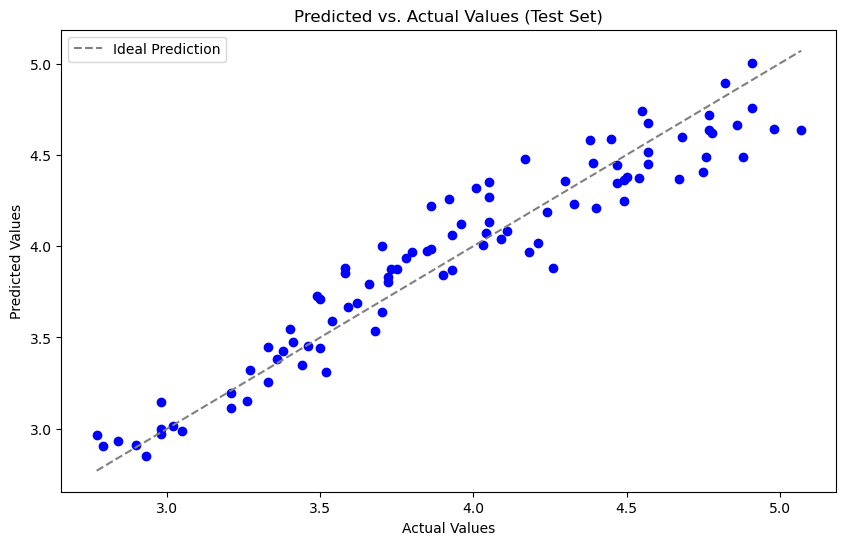

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17506186260839035
RAE: 0.2814653014638112
MAE: 0.14247518166251805
R2: 0.9146213123014997


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [68]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [69]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [70]:
lambdas = [0, 0.01, 0.03, 0.5]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=250
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/250
9/9 [==============================] - 2s 6ms/step - loss: 15.4614 - mae: 3.8697
Epoch 2/250
9/9 [==============================] - 0s 10ms/step - loss: 14.6496 - mae: 3.7661
Epoch 3/250
9/9 [==============================] - 0s 9ms/step - loss: 13.8529 - mae: 3.6626
Epoch 4/250
9/9 [==============================] - 0s 9ms/step - loss: 13.0973 - mae: 3.5599
Epoch 5/250
9/9 [==============================] - 0s 11ms/step - loss: 12.3562 - mae: 3.4561
Epoch 6/250
9/9 [==============================] - 0s 23ms/step - loss: 11.6415 - mae: 3.3520
Epoch 7/250
9/9 [==============================] - 0s 15ms/step - loss: 10.9390 - mae: 3.2469
Epoch 8/250
9/9 [==============================] - 0s 10ms/step - loss: 10.2673 - mae: 3.1421
Epoch 9/250
9/9 [==============================] - 0s 14ms/step - loss: 9.6104 - mae: 3.0351
Epoch 10/250
9/9 [==============================] - 0s 10ms/step - loss: 8.9797 - mae: 2.9281
Epoch 11/250
9/9 [==============================] - 0s 15ms/step

9/9 [==============================] - 0s 8ms/step - loss: 0.2340 - mae: 0.3729
Epoch 89/250
9/9 [==============================] - 0s 9ms/step - loss: 0.2297 - mae: 0.3697
Epoch 90/250
9/9 [==============================] - 0s 9ms/step - loss: 0.2252 - mae: 0.3659
Epoch 91/250
9/9 [==============================] - 0s 9ms/step - loss: 0.2212 - mae: 0.3626
Epoch 92/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2170 - mae: 0.3591
Epoch 93/250
9/9 [==============================] - 0s 9ms/step - loss: 0.2131 - mae: 0.3559
Epoch 94/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2093 - mae: 0.3527
Epoch 95/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2054 - mae: 0.3494
Epoch 96/250
9/9 [==============================] - 0s 24ms/step - loss: 0.2016 - mae: 0.3463
Epoch 97/250
9/9 [==============================] - 0s 12ms/step - loss: 0.1981 - mae: 0.3432
Epoch 98/250
9/9 [==============================] - 0s 9ms/step - loss: 0.1946 - 

9/9 [==============================] - 0s 11ms/step - loss: 0.0726 - mae: 0.2094
Epoch 175/250
9/9 [==============================] - 0s 12ms/step - loss: 0.0718 - mae: 0.2083
Epoch 176/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0711 - mae: 0.2073
Epoch 177/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0704 - mae: 0.2064
Epoch 178/250
9/9 [==============================] - 0s 11ms/step - loss: 0.0698 - mae: 0.2054
Epoch 179/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0693 - mae: 0.2045
Epoch 180/250
9/9 [==============================] - 0s 14ms/step - loss: 0.0685 - mae: 0.2034
Epoch 181/250
9/9 [==============================] - 0s 11ms/step - loss: 0.0679 - mae: 0.2025
Epoch 182/250
9/9 [==============================] - 0s 12ms/step - loss: 0.0672 - mae: 0.2016
Epoch 183/250
9/9 [==============================] - 0s 13ms/step - loss: 0.0667 - mae: 0.2006
Epoch 184/250
9/9 [==============================] - 0s 13ms/step 

9/9 [==============================] - 0s 9ms/step - loss: 10.7077 - mae: 3.0643
Epoch 11/250
9/9 [==============================] - 0s 8ms/step - loss: 10.2208 - mae: 2.9732
Epoch 12/250
9/9 [==============================] - 0s 9ms/step - loss: 9.7502 - mae: 2.8834
Epoch 13/250
9/9 [==============================] - 0s 7ms/step - loss: 9.2845 - mae: 2.7915
Epoch 14/250
9/9 [==============================] - 0s 10ms/step - loss: 8.8227 - mae: 2.6981
Epoch 15/250
9/9 [==============================] - 0s 11ms/step - loss: 8.3667 - mae: 2.6038
Epoch 16/250
9/9 [==============================] - 0s 12ms/step - loss: 7.9051 - mae: 2.5080
Epoch 17/250
9/9 [==============================] - 0s 9ms/step - loss: 7.4611 - mae: 2.4123
Epoch 18/250
9/9 [==============================] - 0s 10ms/step - loss: 7.0202 - mae: 2.3170
Epoch 19/250
9/9 [==============================] - 0s 8ms/step - loss: 6.5822 - mae: 2.2245
Epoch 20/250
9/9 [==============================] - 0s 26ms/step - loss: 6.16

9/9 [==============================] - 0s 10ms/step - loss: 0.2453 - mae: 0.3279
Epoch 98/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2410 - mae: 0.3244
Epoch 99/250
9/9 [==============================] - 0s 17ms/step - loss: 0.2366 - mae: 0.3206
Epoch 100/250
9/9 [==============================] - 0s 12ms/step - loss: 0.2324 - mae: 0.3171
Epoch 101/250
9/9 [==============================] - 0s 18ms/step - loss: 0.2280 - mae: 0.3133
Epoch 102/250
9/9 [==============================] - 0s 14ms/step - loss: 0.2240 - mae: 0.3103
Epoch 103/250
9/9 [==============================] - 0s 16ms/step - loss: 0.2200 - mae: 0.3068
Epoch 104/250
9/9 [==============================] - 0s 11ms/step - loss: 0.2162 - mae: 0.3034
Epoch 105/250
9/9 [==============================] - 0s 12ms/step - loss: 0.2123 - mae: 0.3004
Epoch 106/250
9/9 [==============================] - 0s 10ms/step - loss: 0.2089 - mae: 0.2973
Epoch 107/250
9/9 [==============================] - 0s 11ms/step -

9/9 [==============================] - 0s 8ms/step - loss: 0.0955 - mae: 0.1771
Epoch 184/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0949 - mae: 0.1763
Epoch 185/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0946 - mae: 0.1764
Epoch 186/250
9/9 [==============================] - 0s 11ms/step - loss: 0.0940 - mae: 0.1757
Epoch 187/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0934 - mae: 0.1746
Epoch 188/250
9/9 [==============================] - 0s 16ms/step - loss: 0.0930 - mae: 0.1742
Epoch 189/250
9/9 [==============================] - 0s 18ms/step - loss: 0.0925 - mae: 0.1736
Epoch 190/250
9/9 [==============================] - 0s 19ms/step - loss: 0.0920 - mae: 0.1731
Epoch 191/250
9/9 [==============================] - 0s 11ms/step - loss: 0.0916 - mae: 0.1727
Epoch 192/250
9/9 [==============================] - 0s 12ms/step - loss: 0.0912 - mae: 0.1723
Epoch 193/250
9/9 [==============================] - 0s 11ms/step -

9/9 [==============================] - 0s 10ms/step - loss: 5.1297 - mae: 1.9779
Epoch 20/250
9/9 [==============================] - 0s 12ms/step - loss: 4.7592 - mae: 1.8966
Epoch 21/250
9/9 [==============================] - 0s 14ms/step - loss: 4.4096 - mae: 1.8157
Epoch 22/250
9/9 [==============================] - 0s 9ms/step - loss: 4.0834 - mae: 1.7347
Epoch 23/250
9/9 [==============================] - 0s 13ms/step - loss: 3.7790 - mae: 1.6588
Epoch 24/250
9/9 [==============================] - 0s 8ms/step - loss: 3.4892 - mae: 1.5832
Epoch 25/250
9/9 [==============================] - 0s 11ms/step - loss: 3.2183 - mae: 1.5085
Epoch 26/250
9/9 [==============================] - 0s 11ms/step - loss: 2.9668 - mae: 1.4361
Epoch 27/250
9/9 [==============================] - 0s 9ms/step - loss: 2.7348 - mae: 1.3670
Epoch 28/250
9/9 [==============================] - 0s 9ms/step - loss: 2.5184 - mae: 1.2996
Epoch 29/250
9/9 [==============================] - 0s 19ms/step - loss: 2.31

9/9 [==============================] - 0s 7ms/step - loss: 0.2935 - mae: 0.3006
Epoch 107/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2883 - mae: 0.2965
Epoch 108/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2835 - mae: 0.2927
Epoch 109/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2786 - mae: 0.2892
Epoch 110/250
9/9 [==============================] - 0s 14ms/step - loss: 0.2743 - mae: 0.2858
Epoch 111/250
9/9 [==============================] - 0s 13ms/step - loss: 0.2698 - mae: 0.2822
Epoch 112/250
9/9 [==============================] - 0s 13ms/step - loss: 0.2656 - mae: 0.2788
Epoch 113/250
9/9 [==============================] - 0s 12ms/step - loss: 0.2612 - mae: 0.2753
Epoch 114/250
9/9 [==============================] - 0s 9ms/step - loss: 0.2572 - mae: 0.2725
Epoch 115/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2531 - mae: 0.2692
Epoch 116/250
9/9 [==============================] - 0s 9ms/step - los

9/9 [==============================] - 0s 7ms/step - loss: 0.1120 - mae: 0.1688
Epoch 193/250
9/9 [==============================] - 0s 9ms/step - loss: 0.1112 - mae: 0.1686
Epoch 194/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1105 - mae: 0.1682
Epoch 195/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1098 - mae: 0.1677
Epoch 196/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1092 - mae: 0.1678
Epoch 197/250
9/9 [==============================] - 0s 10ms/step - loss: 0.1084 - mae: 0.1676
Epoch 198/250
9/9 [==============================] - 0s 17ms/step - loss: 0.1077 - mae: 0.1675
Epoch 199/250
9/9 [==============================] - 0s 12ms/step - loss: 0.1070 - mae: 0.1672
Epoch 200/250
9/9 [==============================] - 0s 10ms/step - loss: 0.1065 - mae: 0.1671
Epoch 201/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1057 - mae: 0.1663
Epoch 202/250
9/9 [==============================] - 0s 11ms/step - lo

9/9 [==============================] - 0s 6ms/step - loss: 4.4177 - mae: 1.3864
Epoch 29/250
9/9 [==============================] - 0s 7ms/step - loss: 4.1764 - mae: 1.3108
Epoch 30/250
9/9 [==============================] - 0s 8ms/step - loss: 3.9446 - mae: 1.2392
Epoch 31/250
9/9 [==============================] - 0s 13ms/step - loss: 3.7308 - mae: 1.1709
Epoch 32/250
9/9 [==============================] - 0s 12ms/step - loss: 3.5267 - mae: 1.1051
Epoch 33/250
9/9 [==============================] - 0s 9ms/step - loss: 3.3405 - mae: 1.0425
Epoch 34/250
9/9 [==============================] - 0s 14ms/step - loss: 3.1589 - mae: 0.9834
Epoch 35/250
9/9 [==============================] - 0s 8ms/step - loss: 2.9919 - mae: 0.9270
Epoch 36/250
9/9 [==============================] - 0s 11ms/step - loss: 2.8346 - mae: 0.8735
Epoch 37/250
9/9 [==============================] - 0s 13ms/step - loss: 2.6851 - mae: 0.8235
Epoch 38/250
9/9 [==============================] - 0s 11ms/step - loss: 2.547

9/9 [==============================] - 0s 11ms/step - loss: 0.1144 - mae: 0.1867
Epoch 116/250
9/9 [==============================] - 0s 14ms/step - loss: 0.1126 - mae: 0.1865
Epoch 117/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1109 - mae: 0.1870
Epoch 118/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1093 - mae: 0.1875
Epoch 119/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1078 - mae: 0.1870
Epoch 120/250
9/9 [==============================] - 0s 7ms/step - loss: 0.1063 - mae: 0.1867
Epoch 121/250
9/9 [==============================] - 0s 9ms/step - loss: 0.1050 - mae: 0.1870
Epoch 122/250
9/9 [==============================] - 0s 14ms/step - loss: 0.1037 - mae: 0.1869
Epoch 123/250
9/9 [==============================] - 0s 11ms/step - loss: 0.1024 - mae: 0.1868
Epoch 124/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1013 - mae: 0.1871
Epoch 125/250
9/9 [==============================] - 0s 8ms/step - los

Epoch 202/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0828 - mae: 0.1883
Epoch 203/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0831 - mae: 0.1890
Epoch 204/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0830 - mae: 0.1885
Epoch 205/250
9/9 [==============================] - 0s 11ms/step - loss: 0.0828 - mae: 0.1885
Epoch 206/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0830 - mae: 0.1894
Epoch 207/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0829 - mae: 0.1888
Epoch 208/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0829 - mae: 0.1875
Epoch 209/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0828 - mae: 0.1876
Epoch 210/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0828 - mae: 0.1872
Epoch 211/250
9/9 [==============================] - 0s 12ms/step - loss: 0.0828 - mae: 0.1873
Epoch 212/250
9/9 [==============================] - 0s 1

In [71]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.03, CV MSE: 0.03


In [84]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 2
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [85]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.78          3.841603
1           3.86          3.922864
2           3.38          3.429407
3           3.70          3.557344
4           3.72          3.472446
5           4.54          4.460121
6           4.49          4.602749

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2015066277126838
RAE: 0.31719070186513487
MAE: 0.1605590551832448
R2: 0.8868785260115045


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.01
Mean Squared Error for Decision Tree: 0.02


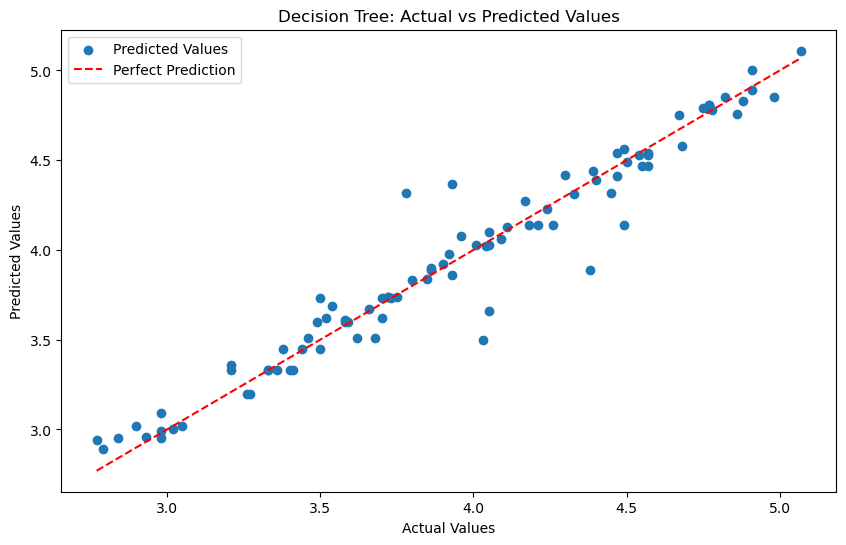

In [87]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13868168118267168
RAE: 0.16749136401829903
MAE: 0.08478260869565223
R2: 0.9464197690805564


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.02
Mean Squared Error for Decision Tree: 0.04


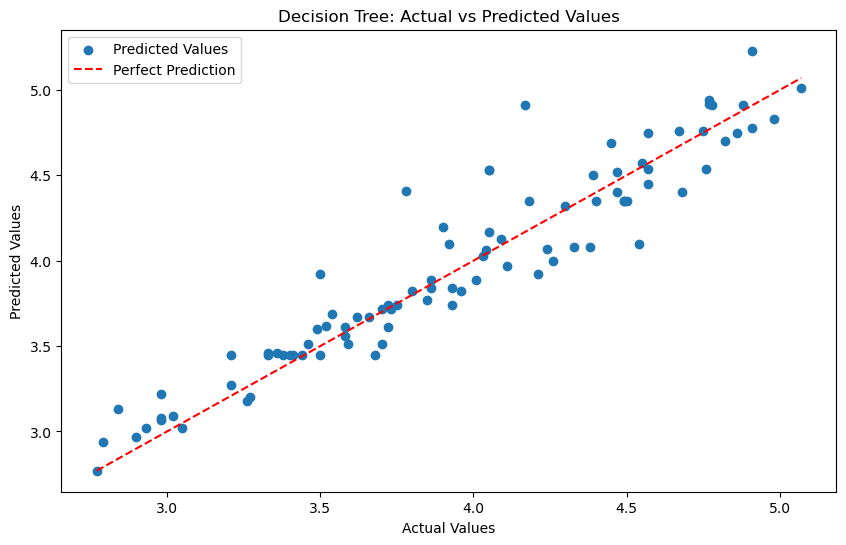

In [89]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [90]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19319679086361666
RAE: 0.2737839604145273
MAE: 0.13858695652173922
R2: 0.8960160760968252


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.03


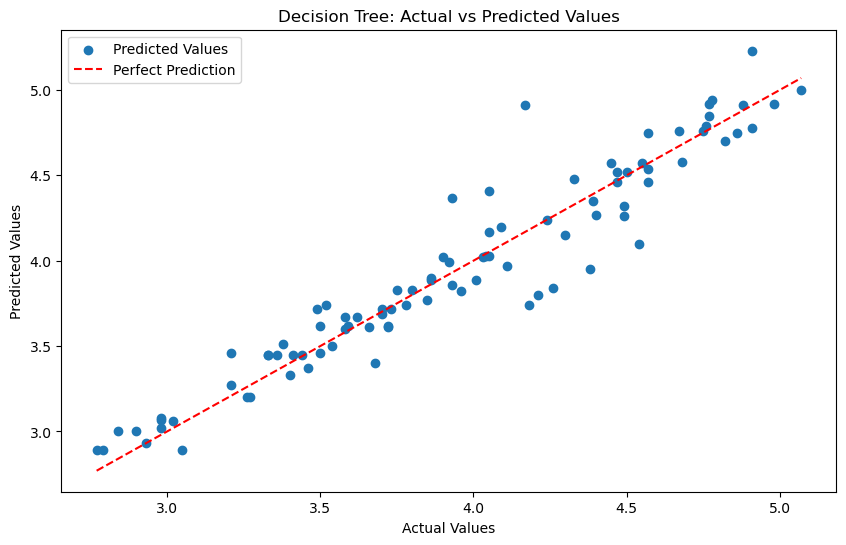

In [91]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17544353730647566
RAE: 0.24092988516478397
MAE: 0.1219565217391305
R2: 0.9142486165266868


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.06


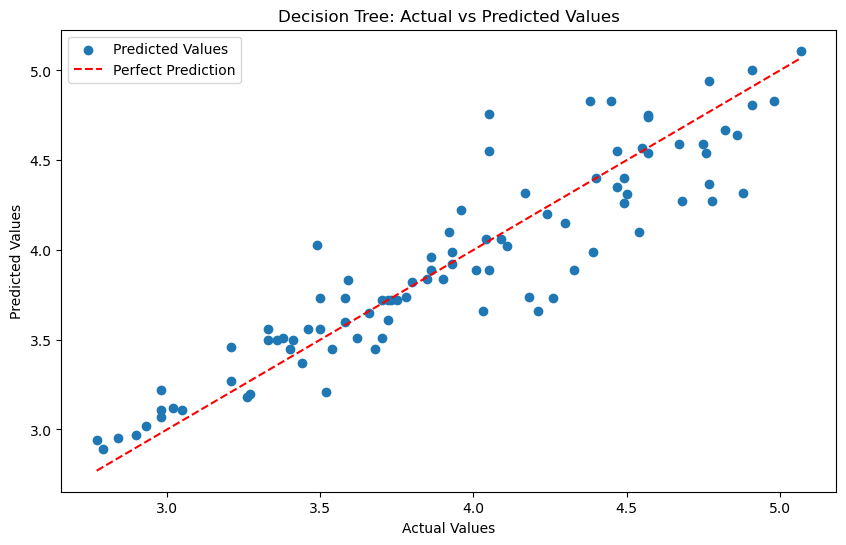

In [93]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [94]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2357227553531995
RAE: 0.3448604238633181
MAE: 0.17456521739130437
R2: 0.8452005535999798


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

Mean Squared Error on Validation Set for Decision Tree: 0.07
Mean Squared Error for Decision Tree: 0.07


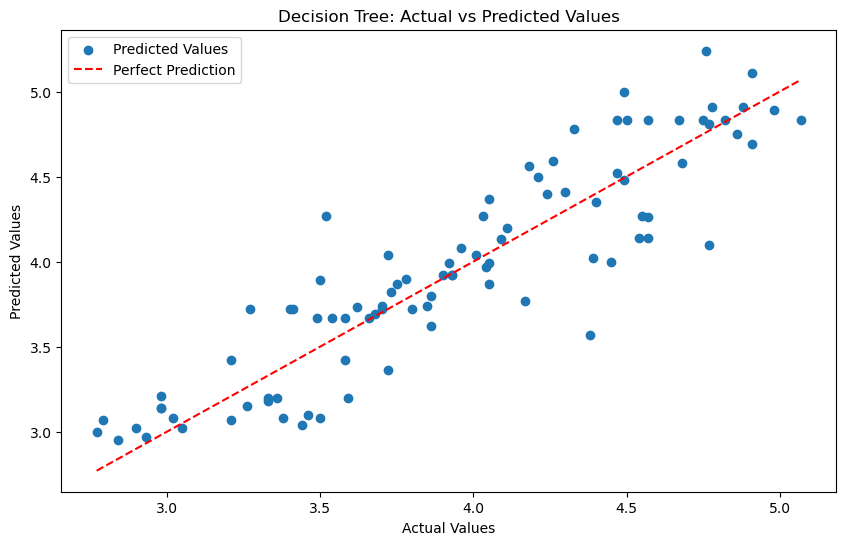

In [95]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [96]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.26866416728437886
RAE: 0.4127158995425264
MAE: 0.2089130434782609
R2: 0.7989121275892069


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.01


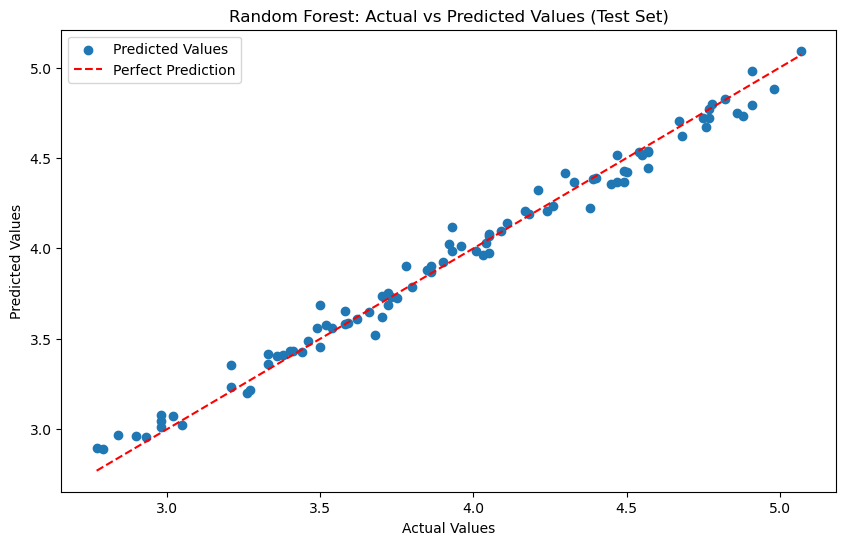

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [98]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Temp max           0.472316
Solar Radiation    0.398313
Wind speed         0.098122
Sunlight hours     0.028136
Temp min           0.003112
dtype: float64


In [99]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07204062184387543
RAE: 0.11083418915134066
MAE: 0.056103260869565685
R2: 0.9855415648547219


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.02


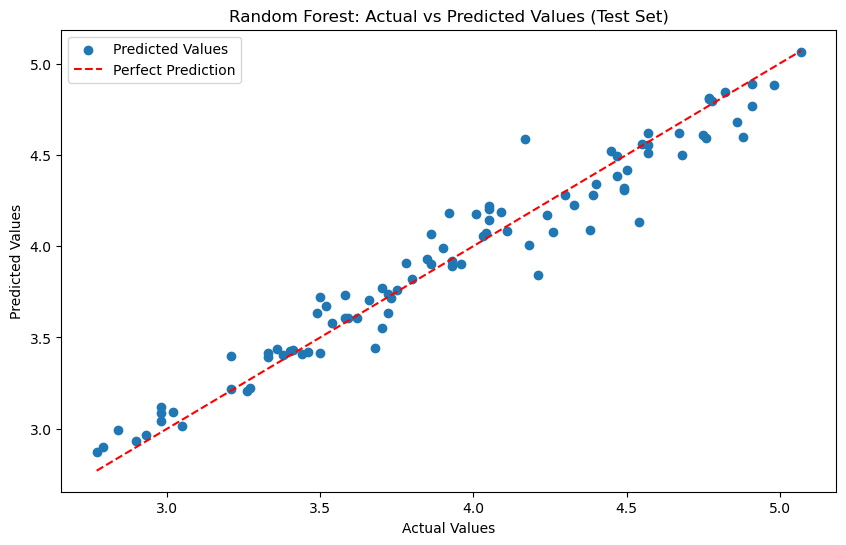

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [101]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13168949398523386
RAE: 0.19398935673606568
MAE: 0.09819565217391303
R2: 0.9516864841187586


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.02


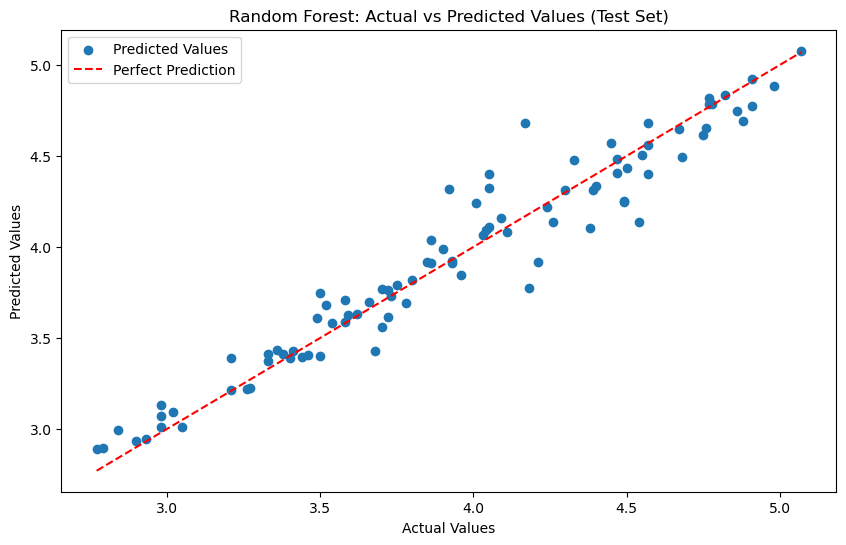

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [103]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1473828989843919
RAE: 0.2067229950518157
MAE: 0.104641304347826
R2: 0.9394853431614183


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.03


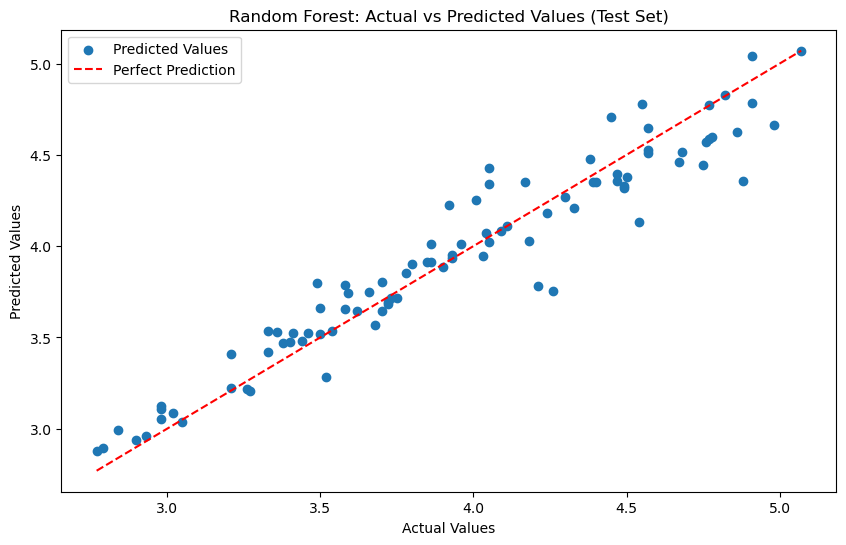

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [105]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16836926324109083
RAE: 0.24731817757445534
MAE: 0.12519021739130395
R2: 0.9210245683294681


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.04


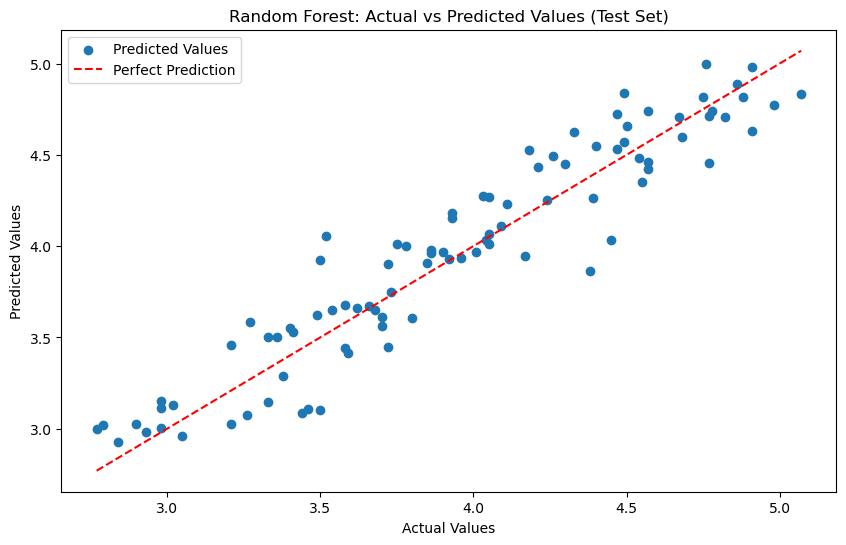

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [107]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19915974389157165
RAE: 0.31992783120156815
MAE: 0.16194456521739115
R2: 0.889498161526171


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.01


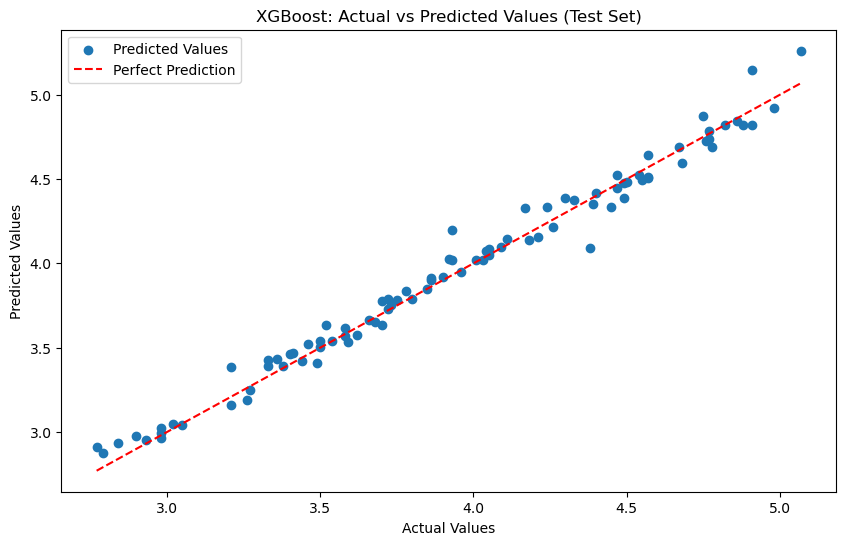

In [18]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07965890490519141
RAE: 0.11379945785455502
MAE: 0.05760425298110297
R2: 0.982321921873849


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

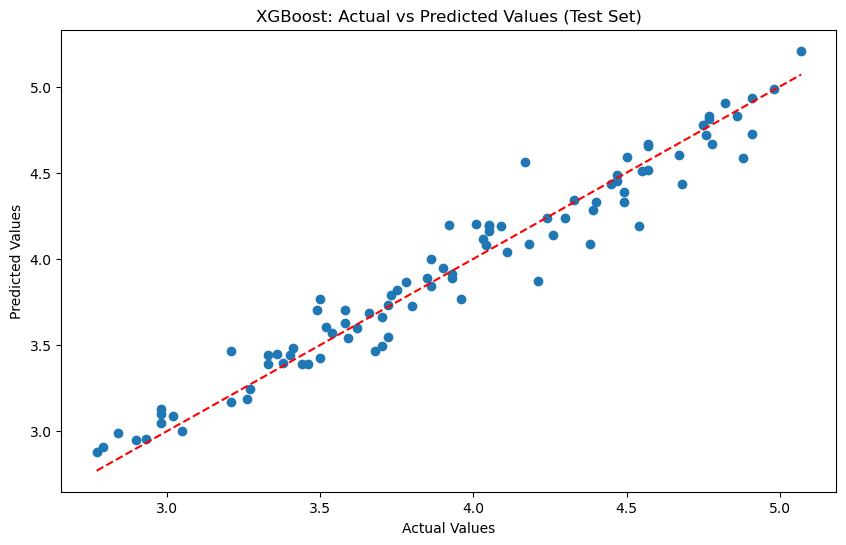

In [108]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [109]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13081458764129855
RAE: 0.1970542733558652
MAE: 0.09974708515664803
R2: 0.9523263132530392


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

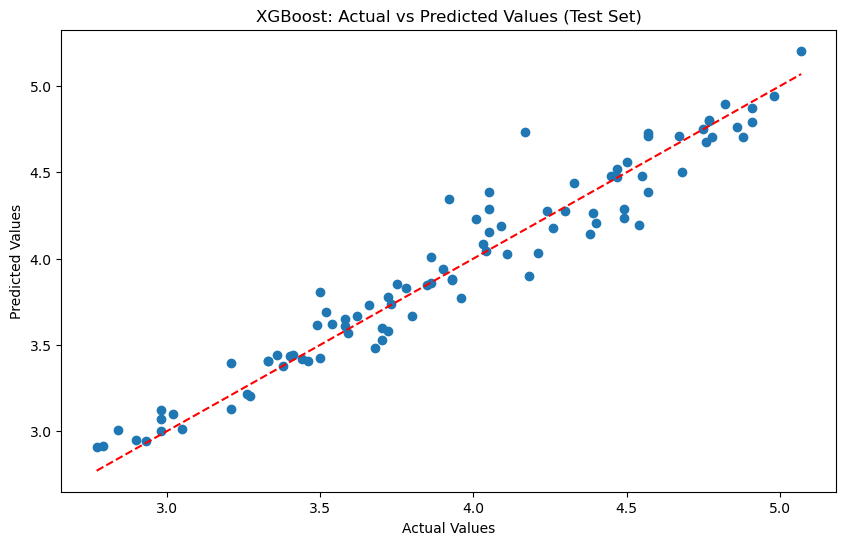

In [110]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14619809035523204
RAE: 0.2161278064906925
MAE: 0.10940193456152209
R2: 0.9404543849898134


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.03


Text(0, 0.5, 'Predicted Values')

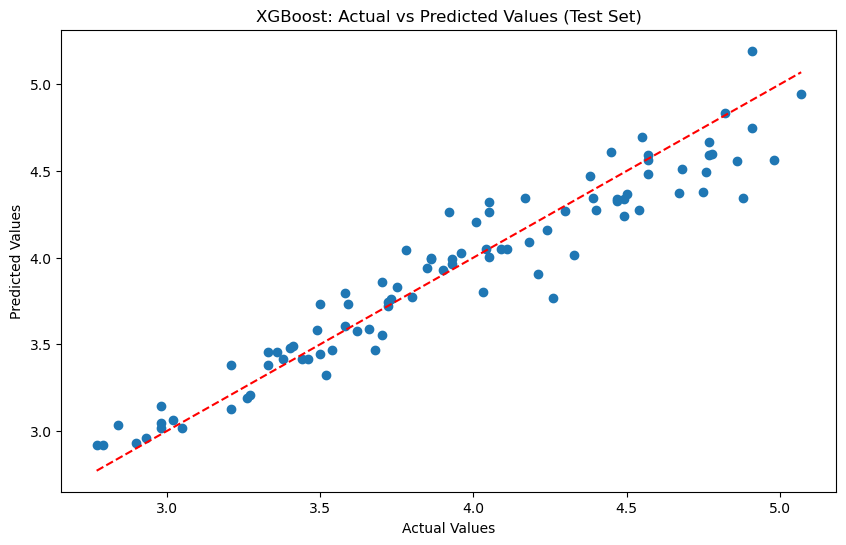

In [112]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [113]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1741518016565461
RAE: 0.2683984111308294
MAE: 0.13586084034131918
R2: 0.9155066890134371


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

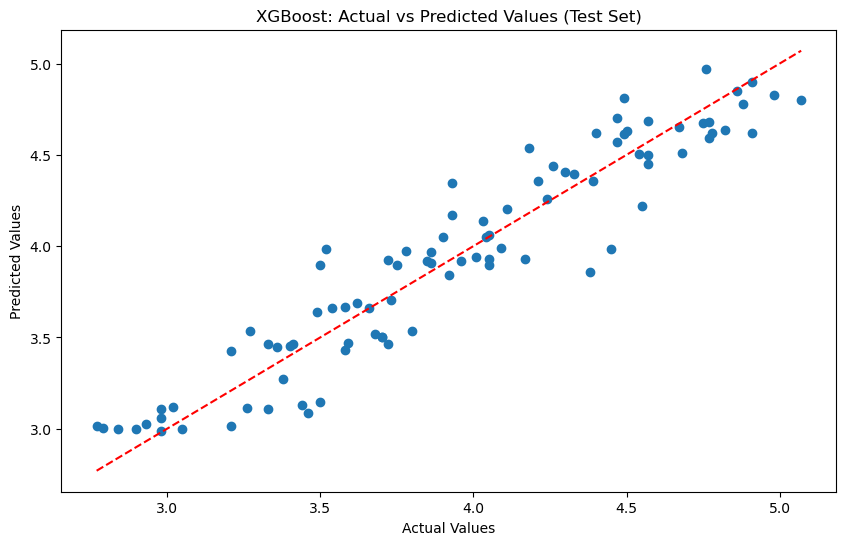

In [114]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [115]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19401894872557118
RAE: 0.3124498684459034
MAE: 0.15815928832344384
R2: 0.8951291762053091


### SVR
### Model 1: All input features

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


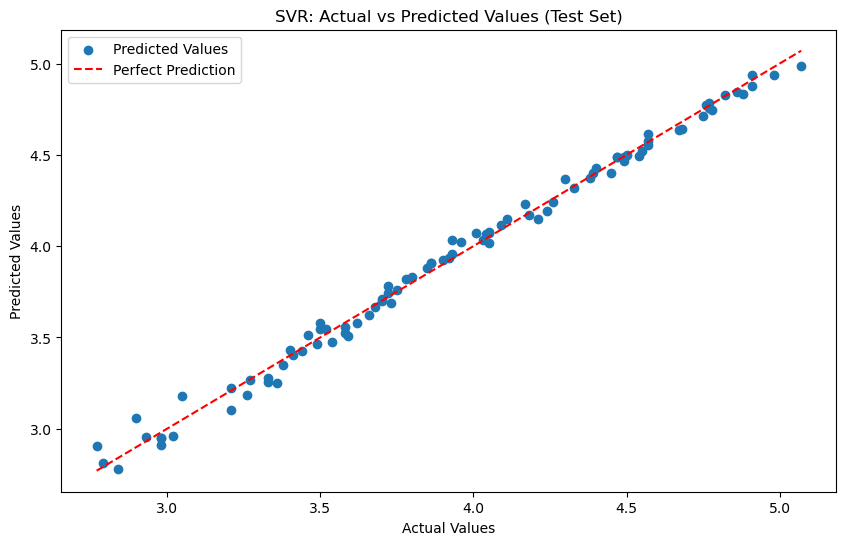

In [116]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [117]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.04973516485092889
RAE: 0.07735514325150004
MAE: 0.039156471614688895
R2: 0.9931088213490195


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.01


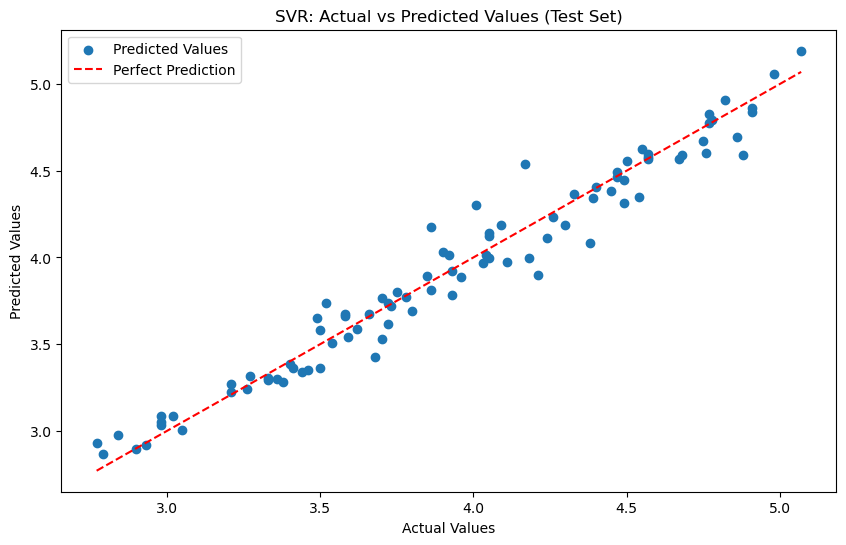

In [118]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [119]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12023794130016364
RAE: 0.17840165645126926
MAE: 0.09030529972823938
R2: 0.9597237109664315


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


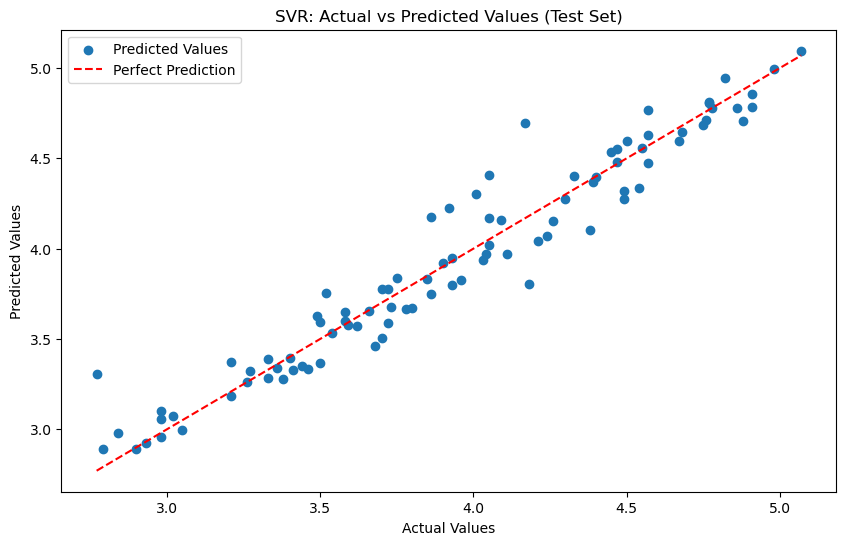

In [120]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [121]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14909215679884838
RAE: 0.21059855563772314
MAE: 0.10660307795064522
R2: 0.9380735791101573


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.03
Mean Squared Error on Test Set for SVR: 0.03


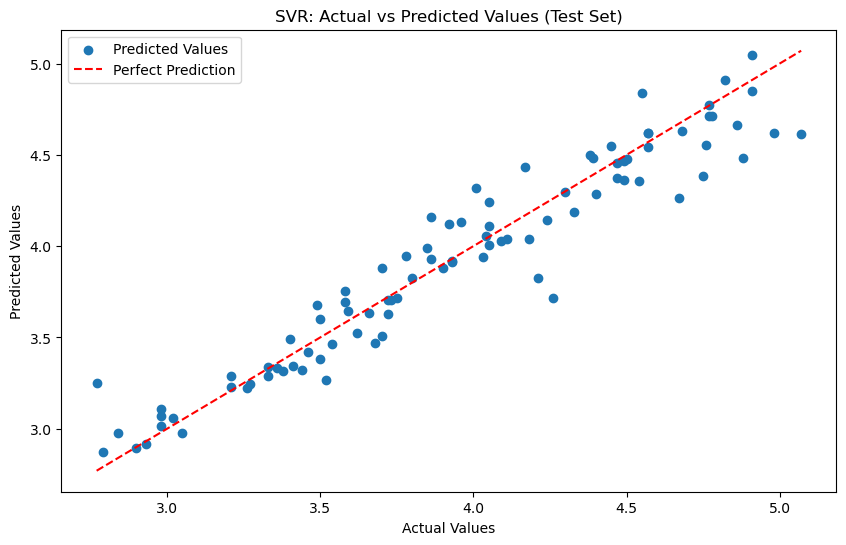

In [122]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [123]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1707432409904526
RAE: 0.24419560261967574
MAE: 0.12360959828257784
R2: 0.9187817875089492


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.03
Mean Squared Error on Test Set for SVR: 0.03


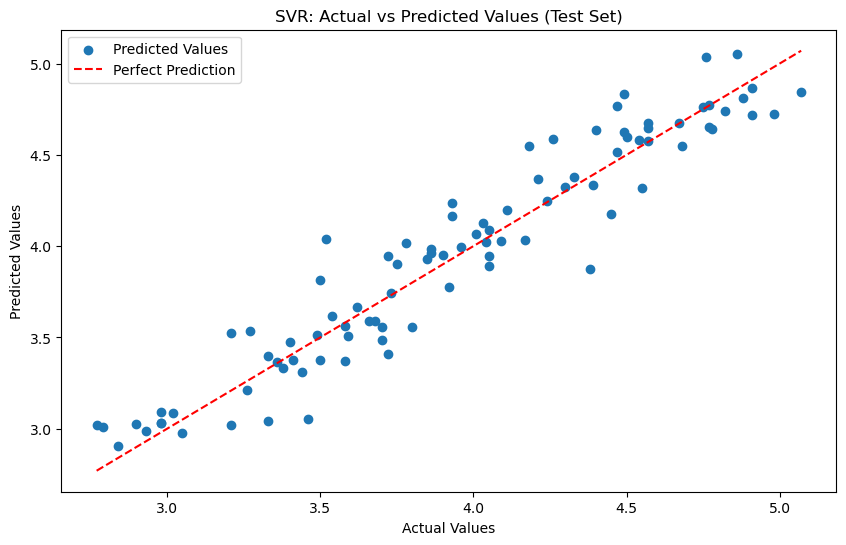

In [124]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [125]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1815219269708513
RAE: 0.2791668049084451
MAE: 0.14131170356211512
R2: 0.9082038278301395
